# Exploring with dataset

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import seaborn as sns

import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
""" def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

def get_serie(url):
    headers = {
        'Authorization': f'Apikey {API_KEY}', 
        'accept': "application/json"
    }

    reponse = requests.get(url, headers=headers)
    if reponse.status_code == 200:
        data = reponse.json()
        df = pd.DataFrame(data)
        df['time_period_end'] = pd.to_datetime(df['time_period_end'])
        return df
    else:
        print(f"Erreur {reponse.status_code}")
        return None
    
    
def get_series(urls):
    series = []
    for url in urls:
        df = get_serie(url)
        if df is not None:
            name = df['title_fr'].iloc[0]
            name = remove_accents(name)
            name = name.replace(' ', '_').replace(',', '')
            name = ''.join(c for c in name if c.isalnum() or c == '_')
            df['time_period'] = pd.to_datetime(df['time_period'])
            df.set_index('time_period', inplace=True)
            serie = df[['obs_value']].rename(columns={'obs_value': name})
            series.append(serie)
            
            
    if series:
        merged_series = pd.concat(series, axis=1)
        return merged_series
    else:
        return pd.DataFrame() """

' def remove_accents(input_str):\n    nfkd_form = unicodedata.normalize(\'NFKD\', input_str)\n    return \'\'.join([c for c in nfkd_form if not unicodedata.combining(c)])\n\ndef get_serie(url):\n    headers = {\n        \'Authorization\': f\'Apikey {API_KEY}\', \n        \'accept\': "application/json"\n    }\n\n    reponse = requests.get(url, headers=headers)\n    if reponse.status_code == 200:\n        data = reponse.json()\n        df = pd.DataFrame(data)\n        df[\'time_period_end\'] = pd.to_datetime(df[\'time_period_end\'])\n        return df\n    else:\n        print(f"Erreur {reponse.status_code}")\n        return None\n    \n    \ndef get_series(urls):\n    series = []\n    for url in urls:\n        df = get_serie(url)\n        if df is not None:\n            name = df[\'title_fr\'].iloc[0]\n            name = remove_accents(name)\n            name = name.replace(\' \', \'_\').replace(\',\', \'\')\n            name = \'\'.join(c for c in name if c.isalnum() or c == \'_\')\n  

1. Livret A: produit d'épargne réglementé par l'État.
2. DAV (Dépôt à Vue): encours des dépôts à vue des ménages résidents
3. DAT (Dépôt à Terme < 2a): encours des dépôts à terme des ménages résidents
4. CSL (Comptes sur livret): encours des livrets ordinaires des ménages résidents
    1. Interest are not regulated by the government
    2. Livrets ordinaires: (Ordinary savings accounts) are non-regulated savings accounts offered by French Banks. They usually have a lower rate than the regulated ones, but offer more flexibility. The interest won is taxated.
    
5. PEL (Plan d'Epargne Logement): encours des plans d'épargne logement des ménages résidents

In [5]:
""" urls = [
    URL_depots_a_terme_duree_inf_2_ans_menages_ISBLSM_residents,
    URL_Depots_a_vue_des_IBLSM_residents_encours,
    URL_livrets_A_menages_ISBLM_residents,
    URL_livrets_ordinaires_menages_ISBLSM_residents,
    URL_PEL_menages_residents,
    URL_PIB_PPA_france,
    URL_taux_chomage_france,
    URL_taux_inflation_france,
    URL_taux_livrets_A,
    URL_taux_remuneration_annuel_livrets_ordinaires,
    URL_taux_remuneration_annuel_nouveaux_PEL_sans_prime,
]
df = get_series(urls) """

' urls = [\n    URL_depots_a_terme_duree_inf_2_ans_menages_ISBLSM_residents,\n    URL_Depots_a_vue_des_IBLSM_residents_encours,\n    URL_livrets_A_menages_ISBLM_residents,\n    URL_livrets_ordinaires_menages_ISBLSM_residents,\n    URL_PEL_menages_residents,\n    URL_PIB_PPA_france,\n    URL_taux_chomage_france,\n    URL_taux_inflation_france,\n    URL_taux_livrets_A,\n    URL_taux_remuneration_annuel_livrets_ordinaires,\n    URL_taux_remuneration_annuel_nouveaux_PEL_sans_prime,\n]\ndf = get_series(urls) '

In [6]:
""" df.sort_index(ascending=False).head(3) """

' df.sort_index(ascending=False).head(3) '

In [7]:
""" n_columns = len(df.columns)

# Adjust the number of rows and columns in the subplot grid
n_rows = (n_columns // 4) + 1

plt.figure(figsize=(16, 12))
for i in range(n_columns):
    plt.subplot(n_rows, 4, i+1)
    sns.lineplot(data=df, x=df.index, y=df.iloc[:, i])

plt.tight_layout()
plt.show() """
    

' n_columns = len(df.columns)\n\n# Adjust the number of rows and columns in the subplot grid\nn_rows = (n_columns // 4) + 1\n\nplt.figure(figsize=(16, 12))\nfor i in range(n_columns):\n    plt.subplot(n_rows, 4, i+1)\n    sns.lineplot(data=df, x=df.index, y=df.iloc[:, i])\n\nplt.tight_layout()\nplt.show() '

## key series

1. Encours (balances)
    1. Comptes à terme et livrets ordinaires, actif des ménages, encours trimestriel.
        1. Actif des ménages: Total assets of households. property, financial investments, savings, etc. That is, the money saved by the households.
    2. Epargne réglementée, actif des ménages, encours trimestriel.
        1. Epargne réglementée: Regulated savings. It is a type of savings account that is regulated by the government. The interest rate is fixed by the government and is usually lower than the market rate. The interest earned is not taxed.
    3. Numéraire et dépôts à vue, actif des ménages, encours trimestriel.
        1. Numéraire et dépôts à vue: Cash and sight deposits. Cash is the money in the form of coins or banknotes. Sight deposits are the money deposited in the bank that can be withdrawn at any time without any notice.
        2. It might show substitution patterns between CSL and other liquid deposits types.
        
2. Taux (rates)
    1. Taux de rémunération annuel des livrets ordinaires
        1. Rates applied to CSL
    2. Taux de rémunération annuel des livrets à taux réglementés
        1. Aggregates interest rates for all regulated savings accounts, including CSL.
    3. Taux du livret A
        1. Interest rate for Livret A
        2. While specific to Livret A, this is a benchmark rate for regulated savings products, including CSL.
    4. Taux moyen de rémunération annuel des dépôts bancaires  
        1. Captures the average return on all bank deposits, providing a competitive baseline for CSL rates.
    

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(6, 4))
sns.mpl.rc("font", size=12)

# Set option to display all columns
pd.set_option('display.max_columns', None)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def display_error(y, y_predict, decimals=3, full=False):
    if full:
        print(f"Mean Squared Error: {mean_squared_error(y, y_predict)}")
        print(f"Mean Absolute Error: {mean_absolute_error(y, y_predict)}")
        print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y, y_predict)}%")
        
    else:
        print(f"Mean Squared Error: {mean_squared_error(y, y_predict):.{decimals}f}")
        print(f"Mean Absolute Error: {mean_absolute_error(y, y_predict):.{decimals}f}")
        print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y, y_predict):.{decimals}f}%")
    


In [10]:
date_initial = '2012-01-01' 
date_end = '2024-07-01'

Magnitud: Millions (6)

In [11]:
df_epargne_total = pd.read_csv('epargne-patrimoine-menages.csv', sep=';', index_col=0, parse_dates = True)
df_epargne_total = df_epargne_total.replace('-', np.nan)
df_epargne_total = df_epargne_total.map(lambda x: str(x).replace(',', '.')).astype(float).sort_index()
df_epargne_total.head(1)

,"Autres actifs financiers et ajustements statistiques, actif des menages, flux annuel","Emplois, actif des menages, flux annuel","Autres placements, actif des menages, flux annuel","Patrimoine financier brut, actif des menages, flux annuel","Produits de taux, actif des menages, flux annuel","Principaux placements financiers, actif des menages, flux annuel","Principaux placements financiers, actif des menages, autres changements de volume (impact SOLVA II) trimestriels","Principaux placements financiers, actif des menages, variation d'encours trimestriel","Principaux placements financiers, actif des menages, encours trimestriel","Taux d'epargne des menages, annuel - France, en % du RDB","Taux d'epargne financiere des menages, annuel - France, en % du RDB","Endettement aupres des institutions financieres, passif des menages, flux annuel",Passif Toutes denominations monetaires des menages vis-a-vis de toutes contreparties - flux des credits commerciaux et avances,"Emplois, passif des menages, flux annuel","Epargne brute des menages, flux trimestriel","FBCF, actif des menages, flux trimestriel","Principaux placements financiers, actif des menages, reevaluation et autres changements de volume, trimestriel","Taux d'epargne des menages, flux cumule sur 4 trimestres - Allemagne, en % du RDB","Taux d'epargne financiere des menages, flux cumule sur 4 trimestres - Allemagne, en % du RDB","Taux d'epargne des menages, flux cumule sur 4 trimestres - Espagne, en % du RDB","Taux d'epargne financiere des menages, flux cumule sur 4 trimestres - Espagne, en % du RDB","Comptes a terme et livrets ordinaires, actif des menages, flux cumule sur 4 trimestres","Epargne reglementee, actif des menages, flux cumule sur 4 trimestres","Depots bancaires remuneres, actif des menages, flux cumule sur 4 trimestres","Numeraire et depots a vue, actif des menages, flux cumule sur 4 trimestres","Titres de creance detenus directements, actif des menages, flux cumule sur 4 trimestres","Actions cotees, actif des menages, flux cumule sur 4 trimestres","Actions non cotees et autres participations, actif des menages,flux cumule sur 4 trimestres","OPC monetaires, actif des menages, flux cumule sur 4 trimestres","Actions placements, actif des menages, flux cumule sur 4 trimestres","Assurance-vie en unites de compte, actif des menages, flux cumule sur 4 trimestres","Assurance-vie support euro, actif des menages, flux cumule sur 4 trimestres","Produits de fonds propres, actif des menages, flux cumule sur 4 trimestres","Produits de taux, actif des menages, flux cumule sur 4 trimestres","Principaux placements financiers, actif des menages, flux cumule sur 4 trimestres","Principaux placements financiers, actif des menages, autres changements de volume (impact SOLVA II), contribution au taux de croissance trimestriel","Principaux placements financiers, actif des menages, autres changements de volume (impact SOLVA II) trimestriels.1","Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel","Epargne reglementee, actif des menages,encours trimestriel","Depots bancaires remuneres, actif des menages,encours trimestriel","Numeraire et depots a vue, actif des menages, encours trimestriel","Menages et ISBLSM, Actif, Titres de dette",Actif Toutes denominations monetaires des menages vis-a-vis de toutes contreparties - encours d'actions cotees,Actif des menages vis-a-vis de toutes contreparties - encours d'actions et autres participations,Actif Toutes denominations monetaires des menages vis-a-vis de toutes contreparties - encours d'OPC monetaires,"Autres placements, actif des menages, encours trimestriel","Autres placements, actif des menages, encours notionel trimestriel","Assurance-vie en unites de compte, actif des menages, encours trimestriel","Assurance-vie support euro, actif des menages, encours trimestriel","Produits de fonds propres, actif des menages, encours trimestriel","Patrimoine financier brut, actif des menages, encours notionel trimestriel","Prod

In [12]:
df_epargne = df_epargne_total[[
    'Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel',
    'Epargne reglementee, actif des menages,encours trimestriel',
    'Numeraire et depots a vue, actif des menages, encours trimestriel',
    'Produits de taux, actif des menages, flux annuel',  # son los flujos de cuanto la casa ahorra
    'Epargne brute des menages, flux trimestriel',  # son los flujos de cuanto la casa ahorra
]].copy()

df_epargne['Produits de taux, actif des menages, flux annuel'] = df_epargne['Produits de taux, actif des menages, flux annuel'].interpolate(method='linear', limit_direction='both')
df_epargne['Epargne brute des menages, flux trimestriel'] = df_epargne['Epargne brute des menages, flux trimestriel'].interpolate(method='linear', limit_direction='both')

df_epargne = df_epargne.loc[ (date_initial < df_epargne.index) &
                             (df_epargne.index < date_end)]

df_epargne.head(1)

,"Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel","Epargne reglementee, actif des menages,encours trimestriel","Numeraire et depots a vue, actif des menages, encours trimestriel","Produits de taux, actif des menages, flux annuel","Epargne brute des menages, flux trimestriel"
Time,,,,,
2012-03-31,266.3,602.745,358.15,77.441,205.347


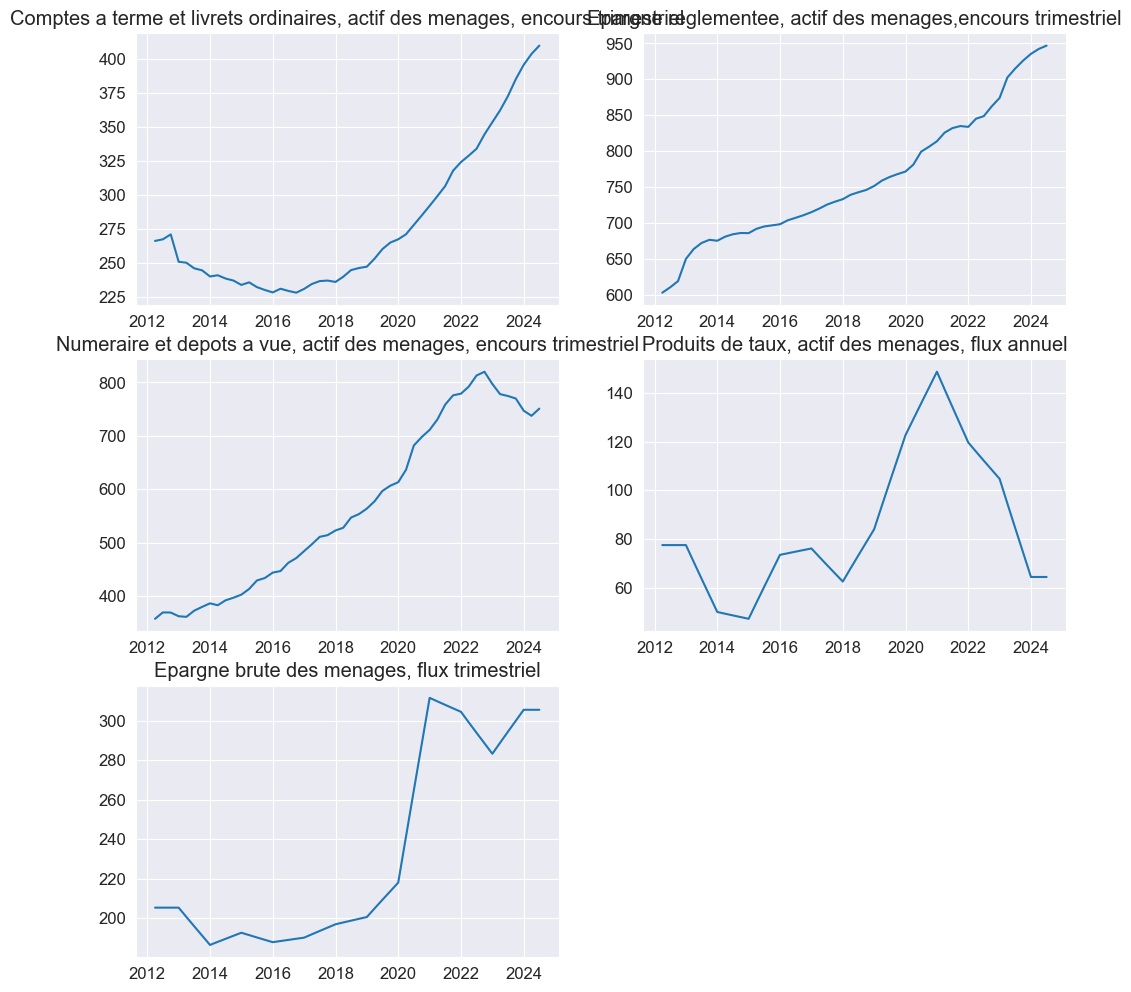

In [13]:
plt.figure(figsize=(12, 12))
for i in range(len(df_epargne.columns)):
    plt.subplot(3, 2, i+1)
    plt.plot(df_epargne.index, df_epargne.iloc[:, i])
    plt.title(df_epargne.columns[i])

In [14]:
df_taux_total = pd.read_csv('taux-remuneration-depots-bancaire.csv', sep=';', index_col=0, parse_dates = True)
df_taux_total.sort_index(ascending=True, inplace=True)
df_taux_total = df_taux_total.replace('-', np.nan)
df_taux_total = df_taux_total.map(lambda x: str(x).replace(',', '.')).astype(float).sort_index()
df_taux_total.head(1)

,Taux de l'Echéance Constante - 5 ans,BCE - Principales opérations de refinancement (taux fixe),"Mensuelle, France, Dépôts, taux annuel, SNF, données CVS","Mensuelle, France, Dépôts, taux annuel, ménages, données CVS",Taux moyen de rémunération annuel des dépôts bancaires,"Mensuelle, France, Dépôts à terme, plus de 2 ans, taux annuel, SNF, données CVS","Mensuelle, France, Dépôts à terme (hors PEL), plus de 2 ans, taux annuel, ménages, données CVS","Mensuelle, France, Dépôts à terme, jusqu'à 2 ans, taux annuel, SNF, données CVS","Mensuelle, France, Dépôts à terme, jusqu'à 2 ans, taux annuel, ménages, données CVS","Mensuelle, France, Dépôts à vue, taux annuel, SNF, données CVS","Mensuelle, France, Dépôts à vue, taux annuel, ménages, données CVS","Formule de calcul du taux du PEL, hors application du taux plancher","Taux de rémunération annuel des dépôts à terme (PEL), plus de 2 ans","Taux de rémunération annuel des nouveaux PEL, sans prime d'état",Taux du Livret A,Taux de rémunération annuel des livrets ordinaires,Taux de rémunération annuel des livrets ordinaires.1,Taux de rémunération annuel des livrets à taux réglementés
Time,,,,,,,,,,,,,,,,,,
1966-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN


In [15]:
df_taux = df_taux_total[[
    'Taux de rémunération annuel des livrets ordinaires',
    'Taux de rémunération annuel des livrets à taux réglementés',
    'Taux du Livret A',
    'Taux moyen de rémunération annuel des dépôts bancaires'    
]].copy()
window = 6
df_taux['Taux du Livret A soft'] = df_taux['Taux du Livret A'].rolling(window=window).mean()
df_taux['Taux de rémunération annuel des livrets à taux réglementés soft'] = df_taux['Taux de rémunération annuel des livrets à taux réglementés'].rolling(window=window).mean()

df_taux = df_taux.loc[ (date_initial < df_taux.index) &
                             (df_taux.index < date_end)]

df_taux.head(1)

,Taux de rémunération annuel des livrets ordinaires,Taux de rémunération annuel des livrets à taux réglementés,Taux du Livret A,Taux moyen de rémunération annuel des dépôts bancaires,Taux du Livret A soft,Taux de rémunération annuel des livrets à taux réglementés soft
Time,,,,,,
2012-01-31,NaN,NaN,2.25,NaN,2.25,NaN


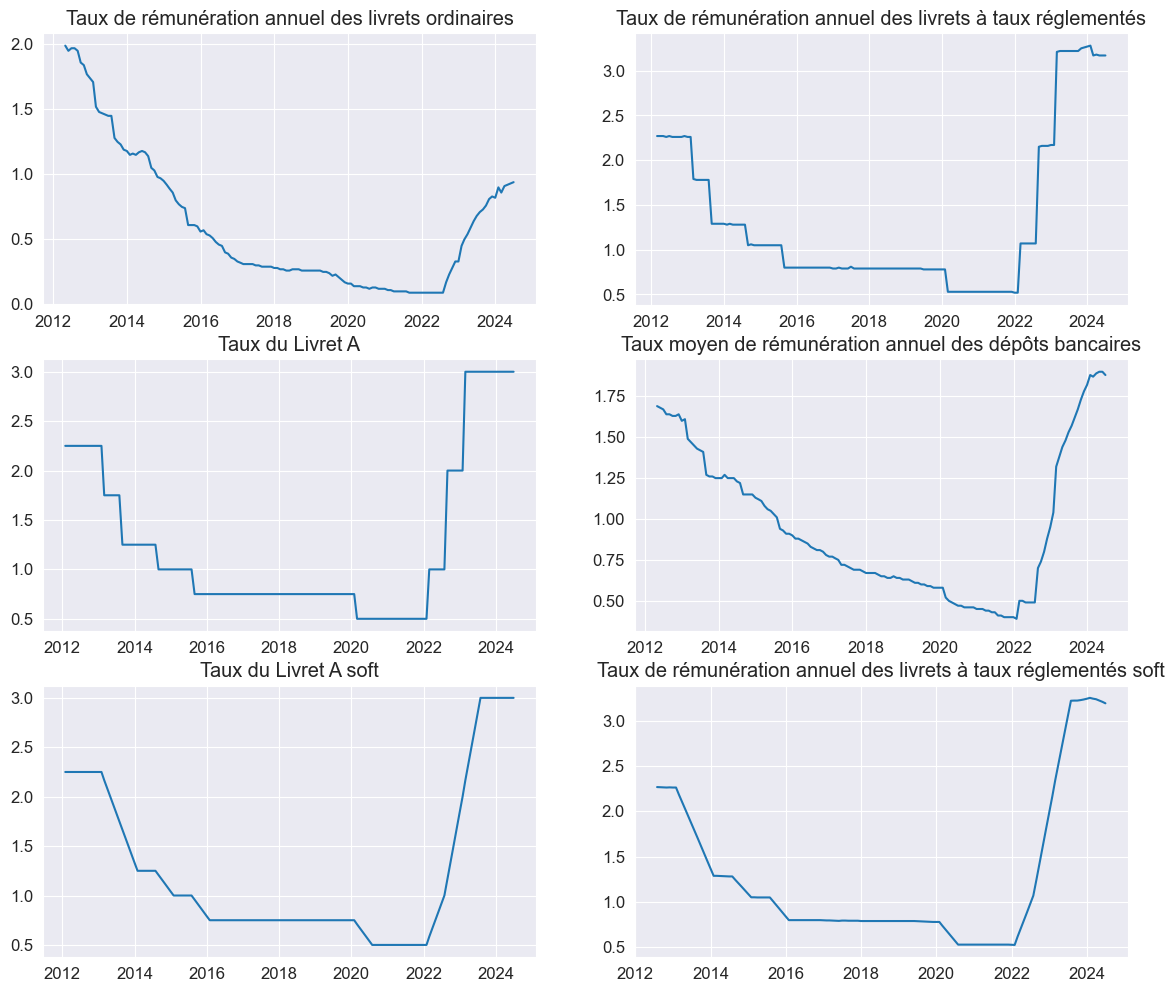

In [16]:
plt.figure(figsize=(14, 12))
for i in range(len(df_taux.columns)):
    plt.subplot(3, 2, i+1)
    plt.plot(df_taux.index, df_taux.iloc[:, i])
    plt.title(df_taux.columns[i])

| **Titre**                          | **Code série**                                     | **Unité**                          | **Magnitude**      | **Méthode d'observation**     | **Source**             |
|------------------------------------|---------------------------------------------------|-------------------------------------|--------------------|-------------------------------|------------------------|
| France, PIB en PPA                 | AME.A.FRA.1.0.212.0.UVGD                          | Unité décrite dans le titre (UNITS)| Milliards (9)      | Fin de période (E)            | Eurostat (4D0)         |
| PIB des Etats-Unis                 | AME.A.USA.1.0.99.0.UVGD                           | Unité décrite dans le titre (UNITS)| Milliards (9)      | Fin de période (E)            | Eurostat (4D0)         |
| Agrégats monétaires France, M2     | BSI1.M.FR.N.V.M20.A.1.U2.2300.Z01.E              | Euro (EUR)                         | Millions (6)       | Fin de période (E)            | Banque de France (FR2) |
| France, Taux d'inflation           | ICP.M.FR.N.000000.4.ANR                           | Variation en pourcentage (PCCH)    | Unités (0)         | Moyenne de la période (A)     | Eurostat (4D0)         |
| France, Taux de chômage (CVS)      | STS.Q.FR.S.UNEH.RTT000.4.000                      | (POURCENT)                         | Unités (0)         | (None)                        | Eurostat (4D0)         |


In [17]:
df_macro = pd.read_csv('macroeconomie.csv', sep=';', index_col=0, parse_dates = True)
df_macro = df_macro.replace('-', np.nan)
df_macro = df_macro.map(lambda x: str(x).replace(',', '.')).astype(float).sort_index()

window = 4
#improving data
df_macro['France, Taux de chomage'] = df_macro['France, Taux de chomage'].interpolate(method='linear', limit_direction='both').rolling(window=window).mean()
df_macro['France, PIB en PPA'] = df_macro['France, PIB en PPA'].interpolate(method='linear', limit_direction='both').rolling(window=window).mean()
df_macro['PIB des Etats-Unis'] = df_macro['PIB des Etats-Unis'].interpolate(method='linear', limit_direction='both').rolling(window=window).mean()

df_macro = df_macro.loc[ (date_initial < df_macro.index) & (df_macro.index < date_end)]

df_macro.head(1)

,"France, PIB en PPA",PIB des Etats-Unis,"Agregats monetaires France, M2","France, Taux inflation","France, Taux de chomage"
Titre :,,,,,
2012-01-31,1822.79,11246.175625,1526265.0,2.6,8.958333


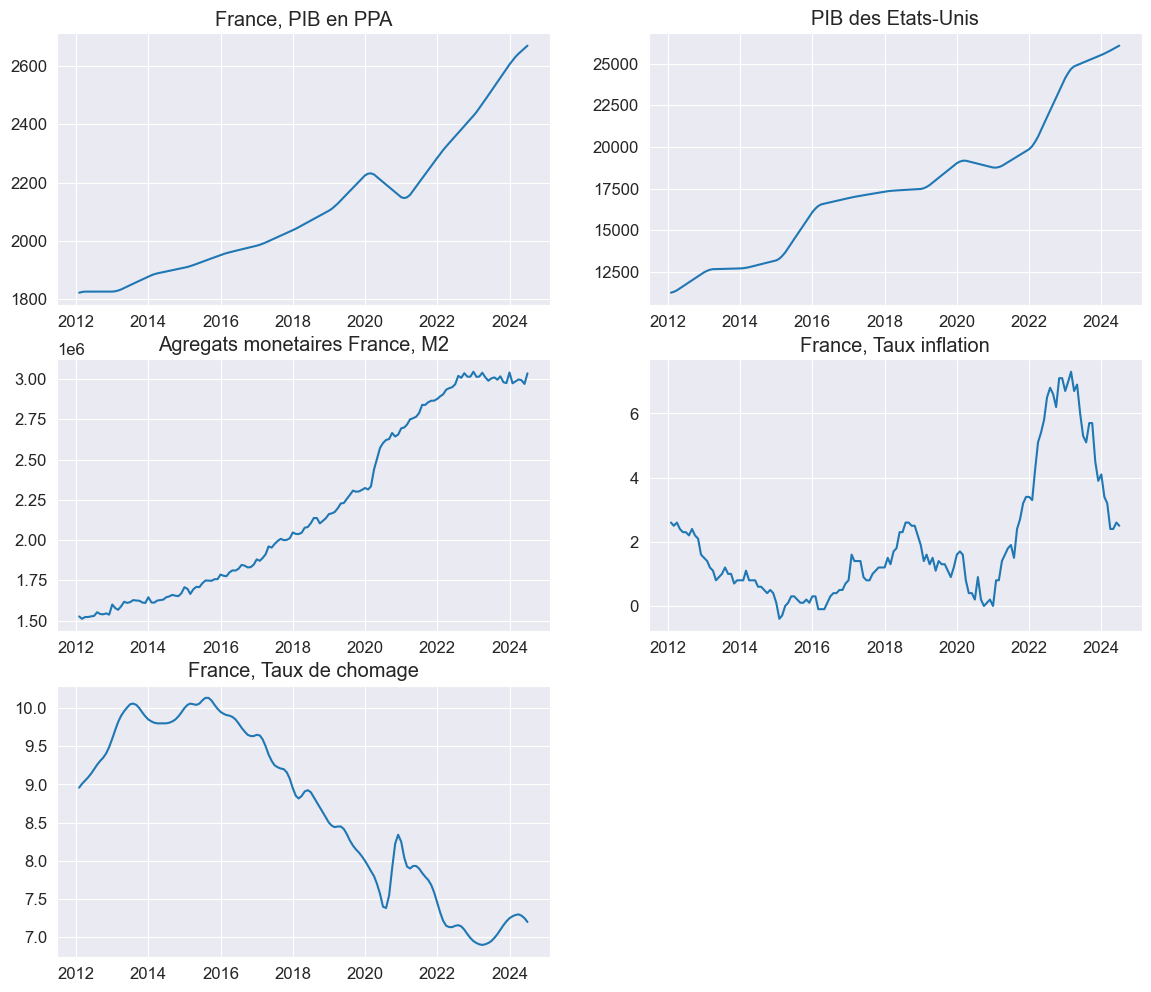

In [18]:
plt.figure(figsize=(14, 12))
for i in range(len(df_macro.columns)):
    plt.subplot(3, 2, i+1)
    plt.plot(df_macro.index, df_macro.iloc[:, i])
    plt.title(df_macro.columns[i])

# Exploration

<Axes: >

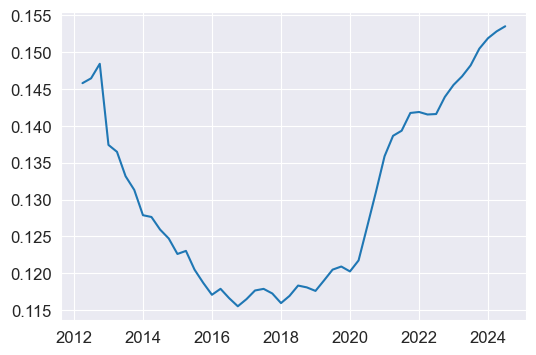

In [19]:
y = df_epargne['Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'] / df_macro['France, PIB en PPA']

sns.lineplot(y)

<Axes: >

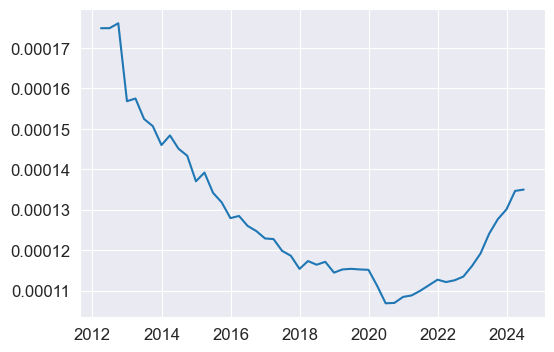

In [20]:
y = df_epargne['Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'] / df_macro['Agregats monetaires France, M2']
sns.lineplot(y)

# ARIMA - SARIMAX

In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.stattools import adfuller, acf, pacf, arma_order_select_ic, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.deterministic import Fourier
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima_process import arma_generate_sample, ArmaProcess
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.stats.stattools import jarque_bera
import statsmodels.api as sm

from scipy.stats import shapiro

from sklearn.metrics import mean_squared_error

def is_stationary_adf_test(series, display = False, significance_level = 0.05):
    result = adfuller(series)
    #if display:
    #    print('ADF Statistic: %f' % result[0], end='\t')
    #    print('p-value: %f' % result[1])
        
    if result[1] < significance_level:
        is_stationary = True
        if display:
            print("Augmented Dickey-Fuller: Series is Stationary")
    else:
        is_stationary = False
        if display:
            print("Augmented Dickey-Fuller: Series is Non-Stationary")
    return is_stationary


def is_stationary_kpss_test(series, display = False, significance_level = 0.05):
    result = kpss(series)
    #if display:
    #    print('KPSS Statistic: %f' % result[0], end='\t')
    #    print('p-value: %f' % result[1])
        
    if result[1] > significance_level:
        is_stationary = True
        if display:
            print("KPSS test: Series is Stationary")
    else:
        is_stationary = False
        if display:
            print("KPSS test: Series is NON-Stationary")
    return is_stationary


<Axes: xlabel='Time', ylabel='Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'>

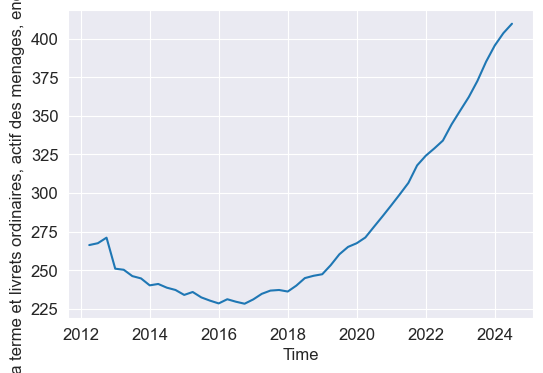

In [22]:
y = df_epargne['Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'].sort_index()
sns.lineplot(y)

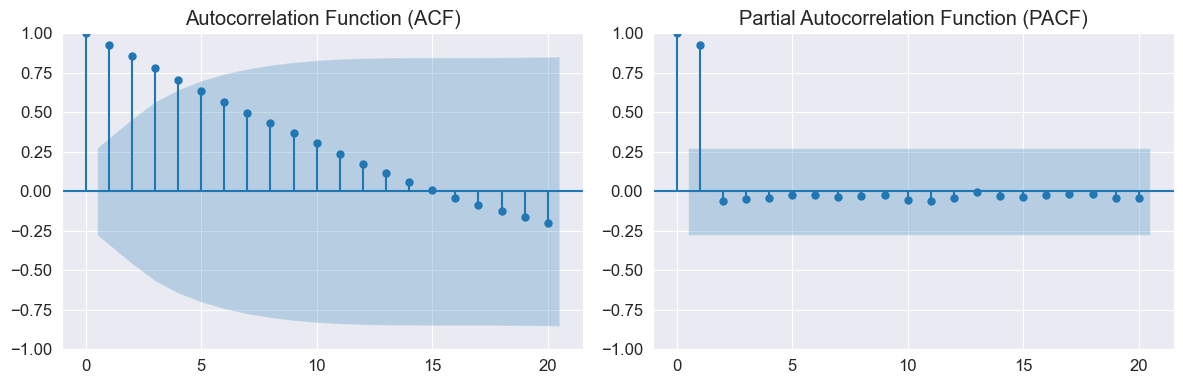

In [23]:
def plot_acf_pacf(series, lags=20, figsize=(12, 5)):
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    plot_acf(series, lags=lags, ax=axes[0])
    axes[0].set_title("Autocorrelation Function (ACF)")
    plot_pacf(series, lags=lags, ax=axes[1])
    axes[1].set_title("Partial Autocorrelation Function (PACF)")
    plt.tight_layout()
    plt.show()

plot_acf_pacf(y, lags=20, figsize=(12, 4))

<Axes: xlabel='Time', ylabel='Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'>

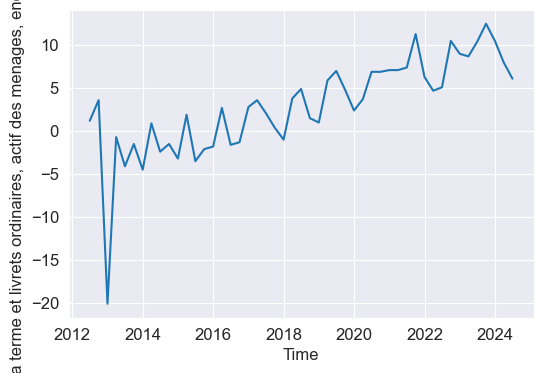

In [24]:
sns.lineplot(y.diff())

In [25]:
_ = is_stationary_adf_test(y.diff().dropna(), display=True)
_ = is_stationary_kpss_test(y.diff().dropna(), display=True)

Augmented Dickey-Fuller: Series is Non-Stationary
KPSS test: Series is NON-Stationary


C:\Users\Marti\AppData\Local\Temp\ipykernel_3184\1372983686.py:42: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series)


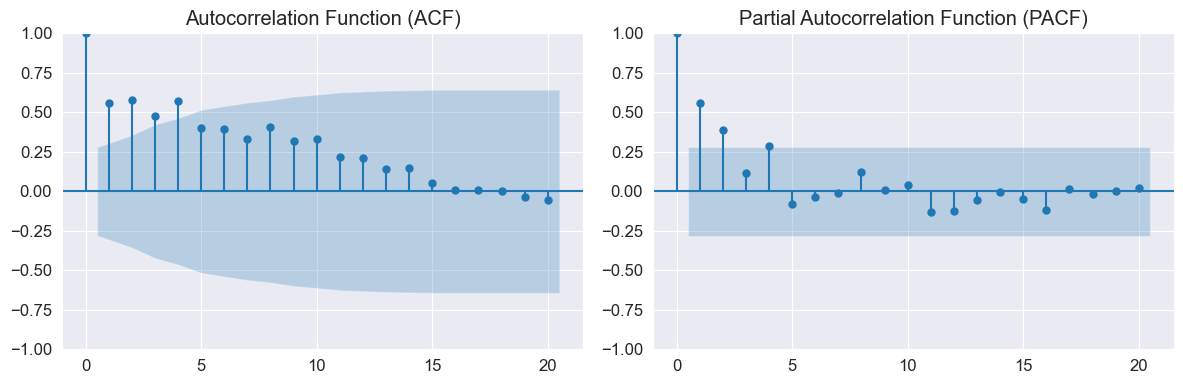

In [26]:
plot_acf_pacf(y.diff().dropna(), lags=20, figsize=(12, 4))

Augmented Dickey-Fuller: Series is Stationary
KPSS test: Series is Stationary


C:\Users\Marti\AppData\Local\Temp\ipykernel_3184\1372983686.py:42: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series)


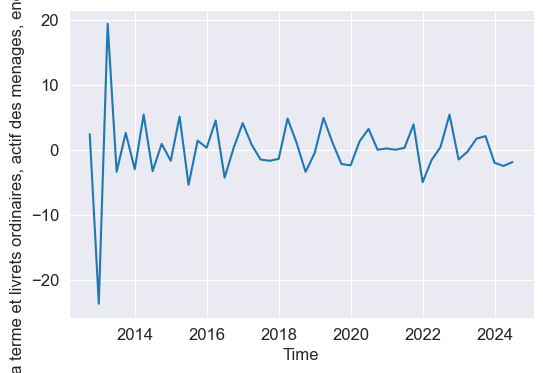

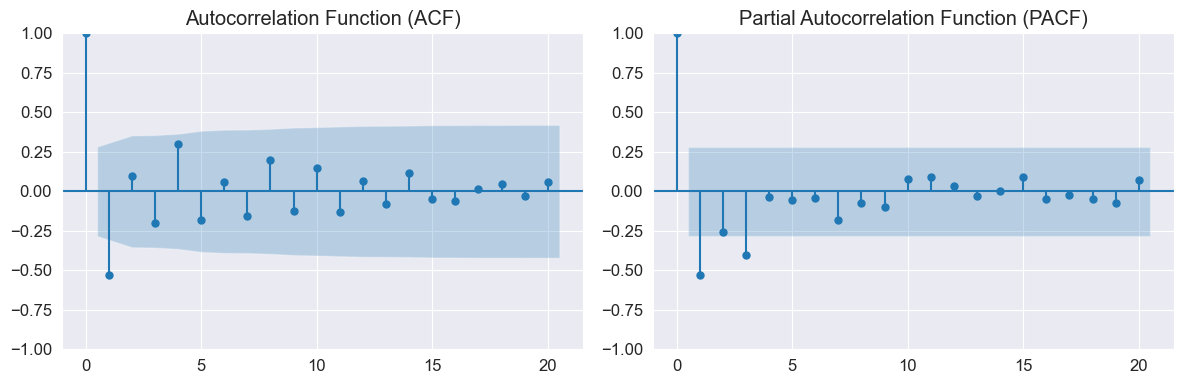

In [27]:
y_2 = y.diff().diff().dropna()
sns.lineplot(y_2)

_ = is_stationary_adf_test(y_2, display=True)
_ = is_stationary_kpss_test(y_2, display=True)

plot_acf_pacf(y_2, lags=20, figsize=(12, 4))

In [28]:
y_2 = y.diff().diff().dropna()
train_size = int(len(y) * 0.8)
train, test = y_2[:train_size], y_2[train_size:]

model_1 = ar_select_order(train, maxlag=15, ic='aic', old_names=False)
print(model_1.ar_lags)
res_1 = model_1.model.fit()
print(res_1.summary())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
                                                          AutoReg Model Results                                                          
Dep. Variable:     Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel   No. Observations:                   40
Model:                                                                               AutoReg(13)   Log Likelihood                 -41.299
Method:                                                                          Conditional MLE   S.D. of innovations              1.117
Date:                                                                           Sat, 01 Feb 2025   AIC                            112.598
Time:                                                                                   23:21:43   BIC                            132.035
Sample:                                                                               12-31-2015   HQIC                         

c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


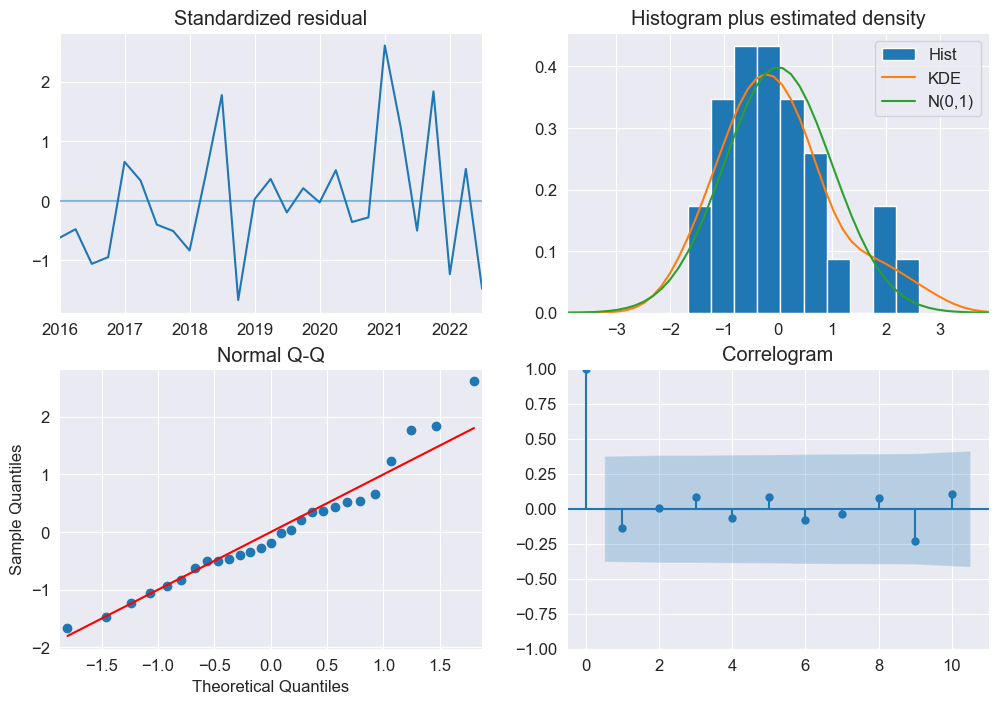

In [29]:
res_1.plot_diagnostics( figsize=(12, 8))
plt.show()

In [30]:
def test_normality(residuals, significance_level = 0.05):
    # Shapiro-Wilk Test
    # H0: The data is normally distributed
    _, p_shapiro = shapiro(residuals)
    if p_shapiro > significance_level:
        print("Shapiro-Wilk Test: Data is normally distributed")
    else:
        print("Shapiro-Wilk Test: Data is not normally distributed")
    
    # Jarque-Bera Test
    # H0: The data is normally distributed using skewness and kurtosis
    # It is sensible to use this test for large sample sizes and 
    # heavy tails in the data
    _, p_jarque_bera, _, _ = jarque_bera(residuals)
    if p_jarque_bera > significance_level:
        print("Jarque-Bera Test: Data is normally distributed")
    else:
        print("Jarque-Bera Test: Data is not normally distributed")
    
    # Ljung-Box Test
    # H0: No autocorrelatino
    df_ljung = acorr_ljungbox(residuals)
    ljung_p_values = df_ljung.iloc[:, 1]
    if np.all(ljung_p_values > significance_level):
        print("Ljung-Box Test: No autocorrelation")
    else:
        print("Ljung-Box Test: Autocorrelation")
        
    # ARCH Test
    # H0: Constant variance
    _, p_het_arch, _, _ = het_arch(residuals)
    if p_het_arch > significance_level:
        print("ARCH Test: Constant Variance")
    else:
        print("ARCH Test: Heteroscedasticity")
        
    # Stationarity Test
    # H0: The data is stationary
    is_stationary_adf_test(residuals, display=True)

In [31]:
test_normality(res_1.resid)

Shapiro-Wilk Test: Data is normally distributed
Jarque-Bera Test: Data is normally distributed
Ljung-Box Test: No autocorrelation
ARCH Test: Constant Variance
Augmented Dickey-Fuller: Series is Stationary


Mean Squared Error: 5.751
Mean Absolute Percentage Error: 193.827%


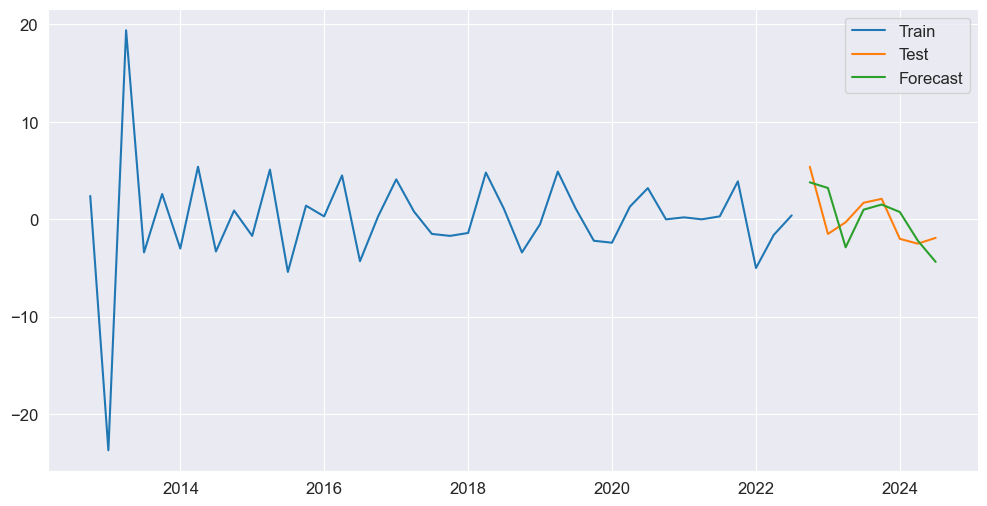

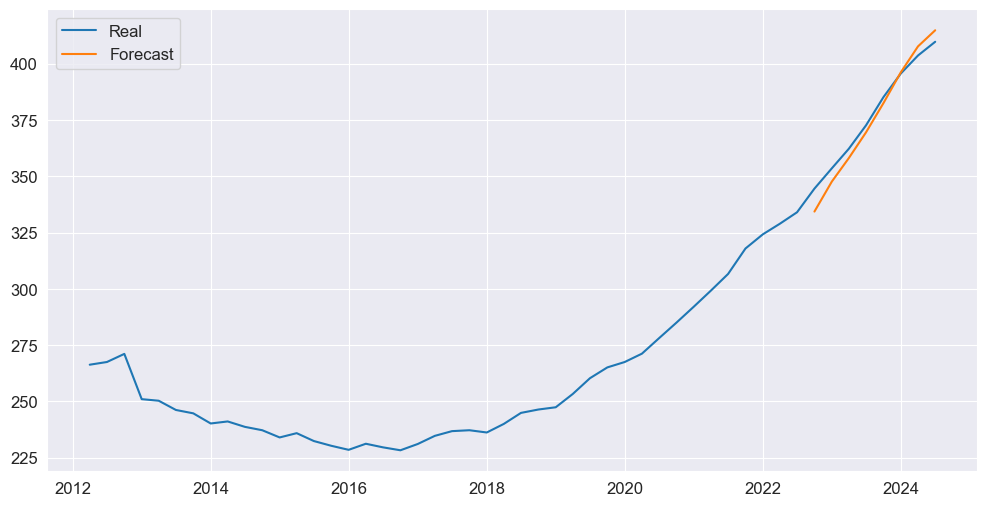

In [32]:
forecast_1_2nd_diff = res_1.forecast(steps=len(test))
forecast_1_2nd_diff.index = test.index

print(f"Mean Squared Error: {mean_squared_error(test, forecast_1_2nd_diff):.3f}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(test, forecast_1_2nd_diff):.3f}%")

# Reconstruct the forecast to the original scale
forecast_1_1st_diff = forecast_1_2nd_diff.cumsum() + y.diff().iloc[train_size - 1]
forecast_original = forecast_1_1st_diff.cumsum() + y.iloc[train_size - 1]

plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_1_2nd_diff, label='Forecast')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y, label='Real')
plt.plot(forecast_original, label='Forecast')
plt.legend()
plt.show()

In [33]:
# comptes livres ordinaires est quatre annuel

train_size = len(y) - 4 * 2
train, test = y[:train_size], y[train_size:]

model_2 = pm.auto_arima(train, 
                        start_p=0, start_q=0, max_p=5, max_q=5, 
                        d=None, stationary=False,
                        seasonal=False, stepwise=True, trace=True,
                        n_jobs=-1, suppress_warnings=True, error_action="ignore")

print(model_2.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=255.574, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=243.154, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=253.586, Time=0.00 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=239.424, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=224.258, Time=0.04 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=225.909, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=225.597, Time=0.05 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0] intercept
Total fit time: 0.866 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   42
Model:               SA

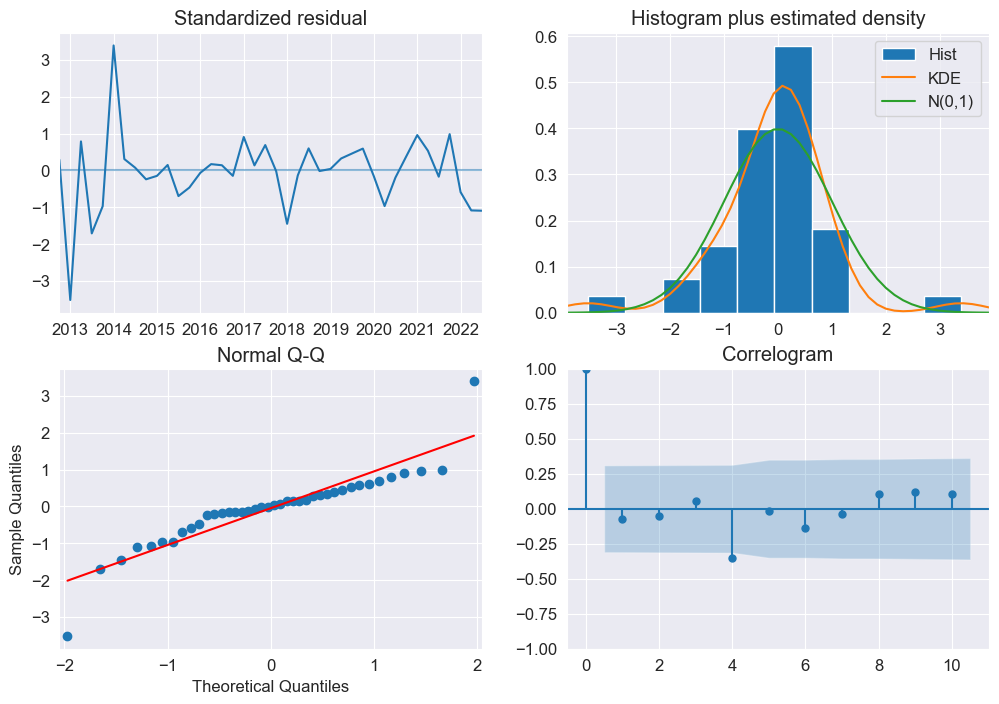

In [34]:
model_2.plot_diagnostics(figsize=(12, 8))
plt.show()

There is a problem here. the residuals are not gaussian distributed $\rightarrow$ which means that the assumption of white noise error is not satisfied. 

Mean Squared Error: 47.090
Mean Absolute Percentage Error: 1.514%


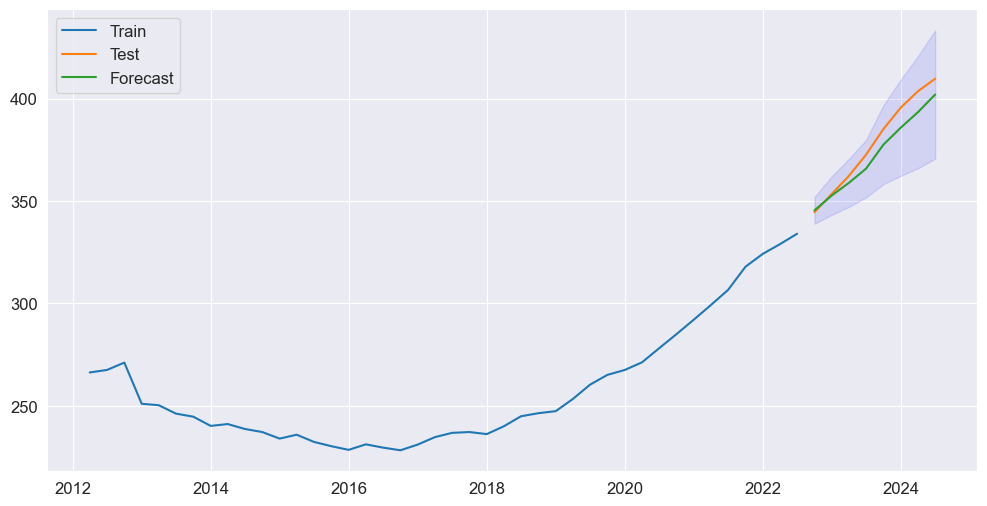

In [35]:
forecast_2, conf_int_2 = model_2.predict(n_periods=len(test), return_conf_int=True, alpha=0.05)

print(f"Mean Squared Error: {mean_squared_error(test, forecast_2):.3f}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(test, forecast_2):.3f}%")

plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast_2, label='Forecast')
plt.fill_between(test.index, conf_int_2[:, 0], conf_int_2[:, 1], color='b', alpha=0.1)

plt.legend()

# Using a ARIMA (3, 2, 0) model to forecast

In [36]:
from statsmodels.tsa.arima.model import ARIMA

# We are going to use all the dataset to predict 2 years in the future
model_3 = ARIMA(y, order=(3, 2, 0))
res_3 = model_3.fit()
print(res_3.summary())

                                                             SARIMAX Results                                                             
Dep. Variable:     Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel   No. Observations:                   50
Model:                                                                            ARIMA(3, 2, 0)   Log Likelihood                -128.582
Date:                                                                           Sat, 01 Feb 2025   AIC                            265.163
Time:                                                                                   23:21:46   BIC                            272.648
Sample:                                                                               03-31-2012   HQIC                           267.992
                                                                                    - 06-30-2024                                         
Covariance Type:                  

c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


- Residuals are white noise or no autocorrelation
- residual doesnt have constant variance (probably data at beginning)
- Residuals are no normally distributed

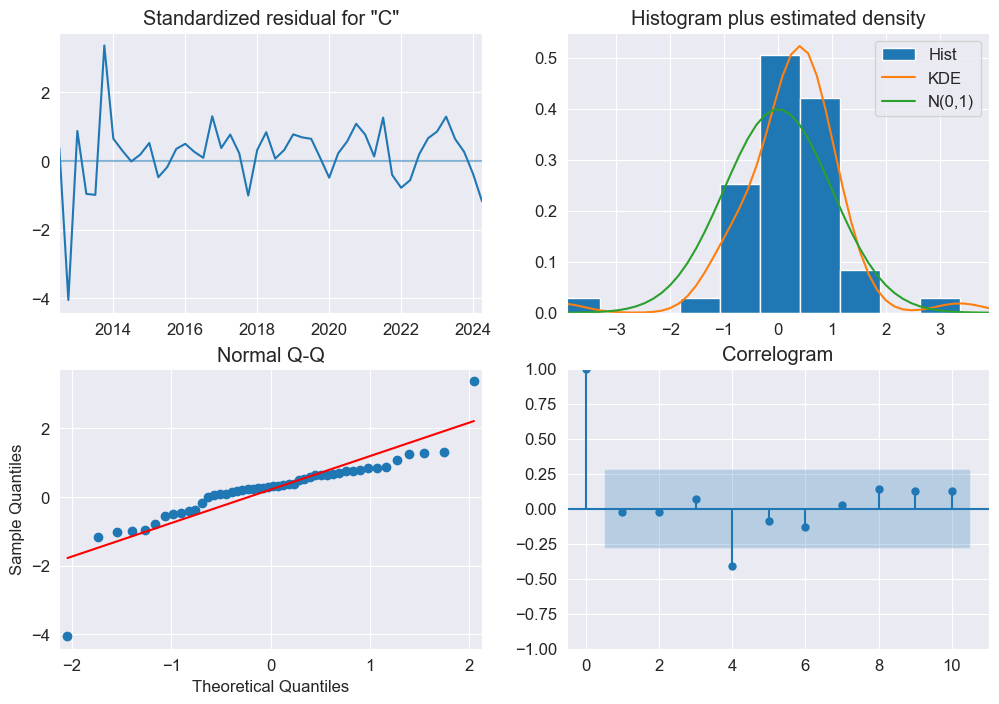

In [37]:
res_3.plot_diagnostics(figsize=(12, 8))
plt.show()

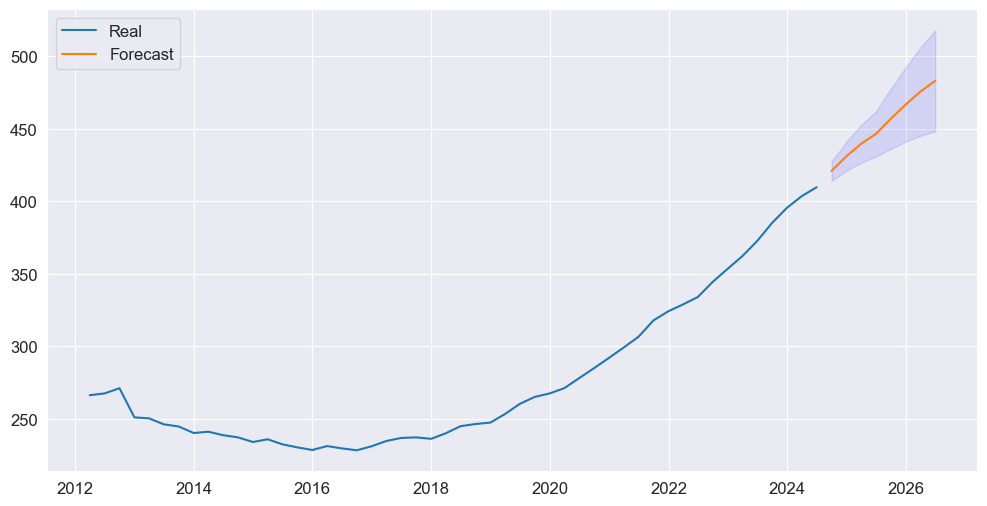

In [38]:
forecast_4 = res_3.get_forecast(steps=8, alpha=0.05)

plt.figure(figsize=(12, 6))
plt.plot(y, label='Real')
plt.plot(forecast_4.predicted_mean, label='Forecast')
plt.fill_between(forecast_4.predicted_mean.index, forecast_4.conf_int().iloc[:, 0], forecast_4.conf_int().iloc[:, 1], color='b', alpha=0.1)
plt.legend()
plt.show()

Searching information correlation

In [39]:
from scipy.stats import pearsonr, spearmanr, kendalltau, chi2_contingency
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.metrics import normalized_mutual_info_score
from statsmodels.tsa.stattools import grangercausalitytests, coint, ccf
from fastdtw import fastdtw

Now, lets try with our time series

### Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel vs Taux renumeration annuel des livrets ordinaires

In [40]:
y = df_epargne['Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'].copy()
X = df_taux['Taux de rémunération annuel des livrets ordinaires'].copy()
normalizer_series = df_macro['Agregats monetaires France, M2'].copy()

y = y / normalizer_series

df = pd.concat([y , X], axis=1)
df.columns = ['y', 'X']
df.head()

,y,X
2012-01-31,NaN,NaN
2012-02-29,NaN,NaN
2012-03-31,0.000175,NaN
2012-04-30,NaN,1.99
2012-05-31,NaN,1.95


In [41]:
date_initial = '2012-03-01' 
date_end = '2024-07-01'

df = df.loc[ (date_initial < df.index) & (df.index < date_end)]
df = df.interpolate(method='linear', limit_direction='both')

y = df['y']
X = df['X']
df.head()

,y,X
2012-03-31,0.000175,1.99
2012-04-30,0.000175,1.99
2012-05-31,0.000175,1.95
2012-06-30,0.000175,1.97
2012-07-31,0.000175,1.97


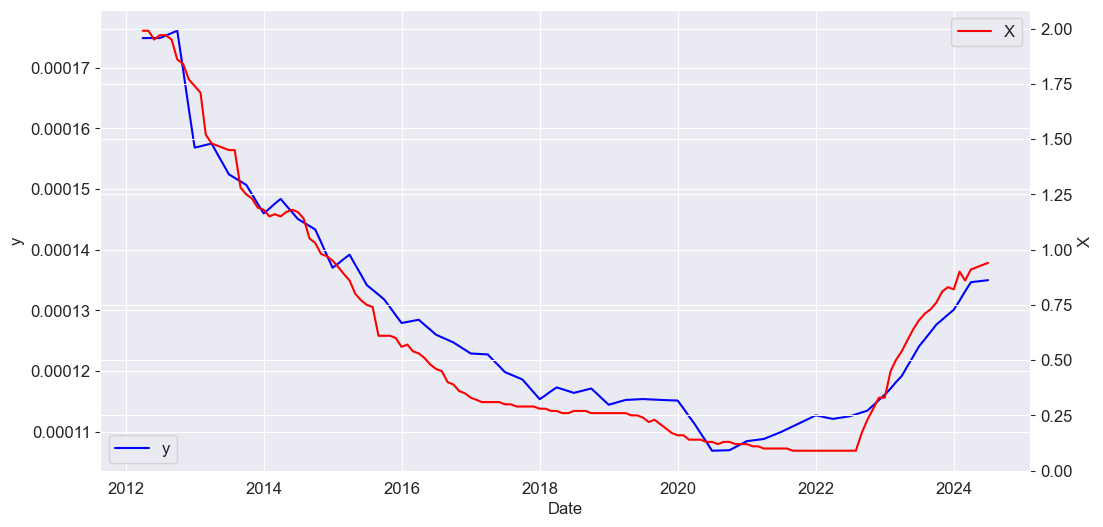

In [42]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df.index, df['y'], color='b', label='y')
ax1.set_ylabel('y')
ax1.set_xlabel('Date')
ax1.legend(loc='lower left')

ax2 = ax1.twinx()
ax2.plot(df.index, df['X'], color='r', label='X')
ax2.legend(loc='upper right')
ax2.set_ylabel('X')

plt.show()

In [43]:
spearman_corr, _ = spearmanr(df.iloc[:, 0], df.iloc[:, 1])
print(f"Spearman Correlation: {spearman_corr:.2f}")

kendall_corr, _ = kendalltau(df.iloc[:, 0], df.iloc[:, 1])
print(f"Kendall's Tau: {kendall_corr:.2f}")

cross_corr = ccf(df.iloc[:, 0], df.iloc[:, 1])
for i in range(10):
    print(f"Cross-Correlation (lag {i}): {cross_corr[i]:.2f}")

# Mutual Information
mi = mutual_info_regression(df.iloc[:, 0].values.reshape(-1, 1), df.iloc[:, 1].values)
print(f"Mutual Information: {mi[0]:.2f}")

coint_t, p_value, _ = coint(df.iloc[:, 0], df.iloc[:, 1])
print(f"Cointegration Test p-value: {p_value:.2f}")

distance, _ = fastdtw(df.iloc[:, 0], df.iloc[:, 1])
print(f"Dynamic Time Warping Distance: {distance:.2f}")

print("\nGranger Causality Test:")
lags = 5
granger_data = grangercausalitytests(df, maxlag=lags)

Spearman Correlation: 0.97
Kendall's Tau: 0.87
Cross-Correlation (lag 0): 0.99
Cross-Correlation (lag 1): 0.97
Cross-Correlation (lag 2): 0.95
Cross-Correlation (lag 3): 0.93
Cross-Correlation (lag 4): 0.90
Cross-Correlation (lag 5): 0.88
Cross-Correlation (lag 6): 0.85
Cross-Correlation (lag 7): 0.82
Cross-Correlation (lag 8): 0.79
Cross-Correlation (lag 9): 0.77
Mutual Information: 1.97
Cointegration Test p-value: 0.47
Dynamic Time Warping Distance: 90.60

Granger Causality Test:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=24.4392 , p=0.0000  , df_denom=144, df_num=1
ssr based chi2 test:   chi2=24.9483 , p=0.0000  , df=1
likelihood ratio test: chi2=23.0439 , p=0.0000  , df=1
parameter F test:         F=24.4392 , p=0.0000  , df_denom=144, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=15.6363 , p=0.0000  , df_denom=141, df_num=2
ssr based chi2 test:   chi2=32.3816 , p=0.0000  , df=2
likelihood ratio test: chi2=29.2465 ,

There is no co-integration

1. First, we will try to forecast the series using ARIMA model. / or use SARIMA model
3. Lastly, the SARIMAX model.

Then

1. ARDL model
2. VAR model

In [44]:
_  = is_stationary_adf_test(y, display=True)
_  = is_stationary_kpss_test(y, display=True)
print()
_ = is_stationary_adf_test(y.diff().dropna(), display=True)
_ = is_stationary_kpss_test(y.diff().dropna(), display=True)
print()
_ = is_stationary_adf_test(y.diff().diff().dropna(), display=True)
_ = is_stationary_kpss_test(y.diff().diff().dropna(), display=True)

Augmented Dickey-Fuller: Series is Non-Stationary
KPSS test: Series is NON-Stationary

Augmented Dickey-Fuller: Series is Non-Stationary
KPSS test: Series is NON-Stationary

Augmented Dickey-Fuller: Series is Stationary
KPSS test: Series is Stationary


C:\Users\Marti\AppData\Local\Temp\ipykernel_3184\1372983686.py:42: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series)
C:\Users\Marti\AppData\Local\Temp\ipykernel_3184\1372983686.py:42: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series)
C:\Users\Marti\AppData\Local\Temp\ipykernel_3184\1372983686.py:42: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series)


In [45]:
y.head(6)

2012-03-31    0.000175
2012-04-30    0.000175
2012-05-31    0.000175
2012-06-30    0.000175
2012-07-31    0.000175
2012-08-31    0.000176
Name: y, dtype: float64

In [46]:
train_size = len(y) - 24
train, test = y[:train_size], y[train_size:]

model_5 = pm.auto_arima(train,
                        max_p=10, max_q=10, 
                        d=2, stationary=False, 
                        seasonal=True, m=12,
                        stepwise=True, trace=True,
                        n_jobs=-1, suppress_warnings=True, error_action="ignore")

print(model_5.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=-2784.165, Time=0.37 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=-2756.966, Time=0.05 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=-2729.391, Time=0.12 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=-2748.453, Time=0.20 sec
 ARIMA(2,2,2)(0,0,1)[12]             : AIC=-2742.453, Time=0.41 sec
 ARIMA(2,2,2)(1,0,0)[12]             : AIC=-2723.391, Time=0.40 sec
 ARIMA(2,2,2)(2,0,1)[12]             : AIC=-2780.873, Time=0.67 sec
 ARIMA(2,2,2)(1,0,2)[12]             : AIC=-2789.283, Time=0.64 sec
 ARIMA(2,2,2)(0,0,2)[12]             : AIC=-2792.082, Time=0.63 sec
 ARIMA(1,2,2)(0,0,2)[12]             : AIC=-2794.082, Time=0.43 sec
 ARIMA(1,2,2)(0,0,1)[12]             : AIC=-2744.453, Time=0.41 sec
 ARIMA(1,2,2)(1,0,2)[12]             : AIC=-2791.283, Time=0.46 sec
 ARIMA(1,2,2)(1,0,1)[12]             : AIC=-2786.165, Time=0.26 sec
 ARIMA(0,2,2)(0,0,2)[12]             : AIC=-2796.082, Time=0.33 sec
 ARIM

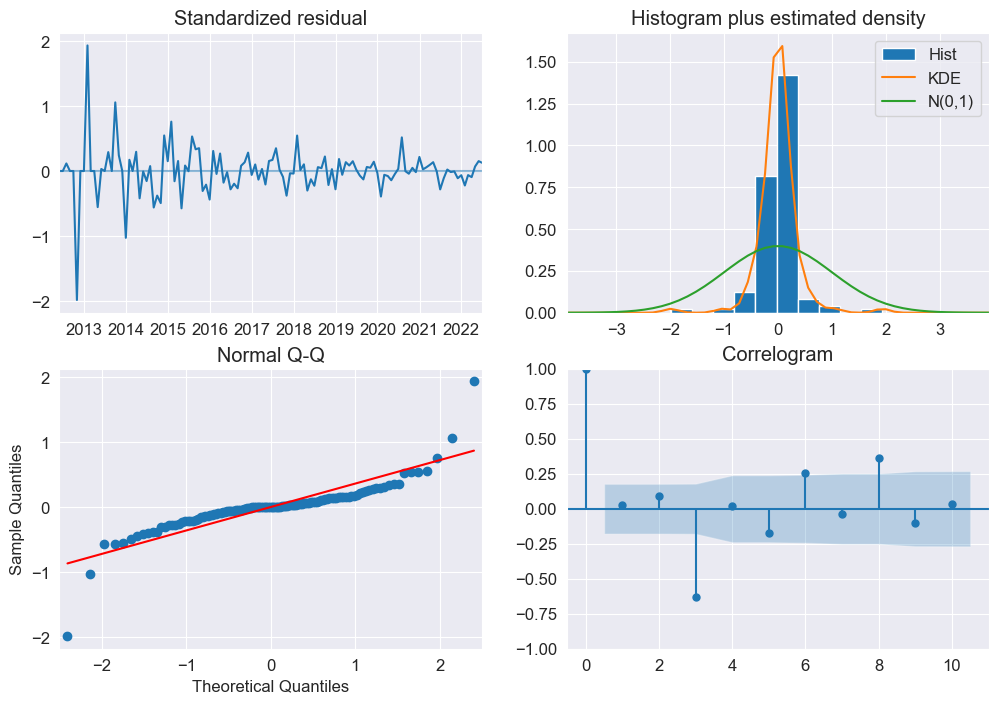

In [47]:
model_5.plot_diagnostics(figsize=(12, 8))
plt.show()

Mean Squared Error: 0.000
Mean Absolute Percentage Error: 13.855%


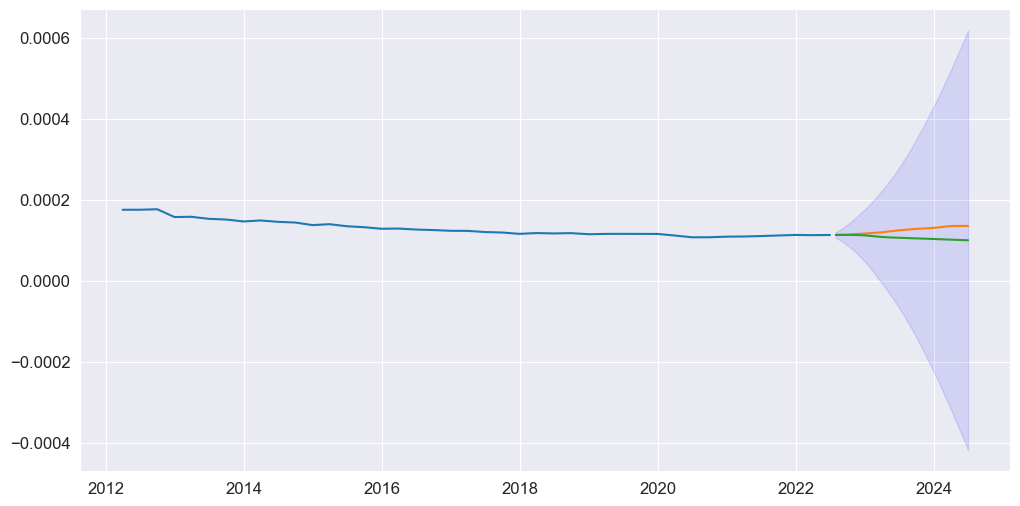

In [48]:
forecast_5, conf_int_5 = model_5.predict(n_periods=len(test), return_conf_int=True, alpha=0.05)

print(f"Mean Squared Error: {mean_squared_error(test, forecast_5):.3f}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(test, forecast_5):.3f}%")

plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast_5, label='Forecast')
plt.fill_between(test.index, conf_int_5[:, 0], conf_int_5[:, 1], color='b', alpha=0.1)
plt.show()

#### SARIMAX

We need to create the lag values ourselves

In [49]:
x_lags = 8

df_sarimax = df.copy()

for i in range(1, x_lags + 1):
    df_sarimax[f"X_lag_{i}"] = df_sarimax['X'].shift(i)
    
df_sarimax.dropna(inplace=True)
df_sarimax.head()

,y,X,X_lag_1,X_lag_2,X_lag_3,X_lag_4,X_lag_5,X_lag_6,X_lag_7,X_lag_8
2012-11-30,0.000163,1.77,1.84,1.86,1.95,1.97,1.97,1.95,1.99,1.99
2012-12-31,0.000157,1.74,1.77,1.84,1.86,1.95,1.97,1.97,1.95,1.99
2013-01-31,0.000157,1.71,1.74,1.77,1.84,1.86,1.95,1.97,1.97,1.95
2013-02-28,0.000157,1.52,1.71,1.74,1.77,1.84,1.86,1.95,1.97,1.97
2013-03-31,0.000157,1.48,1.52,1.71,1.74,1.77,1.84,1.86,1.95,1.97


In [50]:
y = df_sarimax['y']
X = df_sarimax.drop(columns='y')

train_size = len(y) - 12 * 2
train_y, test_y = y[:train_size], y[train_size:]
train_X, test_X = X[:train_size], X[train_size:]

model_6 = pm.auto_arima(train_y, X=train_X,
                        max_p=6, max_q=6, 
                        d=2, stationary=False, 
                        seasonal=True, m=12,
                        stepwise=True, trace=True,
                        n_jobs=-1, suppress_warnings=True, error_action="ignore")

print(model_6.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=-2381.554, Time=0.48 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=-2394.037, Time=0.11 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=-2642.404, Time=0.54 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=-2389.647, Time=0.28 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=-2392.103, Time=0.11 sec
 ARIMA(1,2,0)(2,0,0)[12]             : AIC=-2385.986, Time=0.60 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=-2643.972, Time=0.59 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=-2645.053, Time=0.51 sec
 ARIMA(1,2,0)(0,0,2)[12]             : AIC=-2580.915, Time=0.99 sec
 ARIMA(1,2,0)(1,0,2)[12]             : AIC=-2578.775, Time=1.11 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=-2391.636, Time=0.32 sec
 ARIMA(2,2,0)(0,0,1)[12]             : AIC=-2387.637, Time=0.30 sec


c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1901: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


 ARIMA(1,2,1)(0,0,1)[12]             : AIC=-2387.636, Time=0.30 sec


c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1901: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


 ARIMA(2,2,1)(0,0,1)[12]             : AIC=-2385.636, Time=0.31 sec
 ARIMA(1,2,0)(0,0,1)[12] intercept   : AIC=-2453.595, Time=0.53 sec

Best model:  ARIMA(1,2,0)(0,0,1)[12]          
Total fit time: 7.145 seconds
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  116
Model:             SARIMAX(1, 2, 0)x(0, 0, [1], 12)   Log Likelihood                1334.526
Date:                              Sat, 01 Feb 2025   AIC                          -2645.053
Time:                                      23:22:04   BIC                          -2612.218
Sample:                                  11-30-2012   HQIC                         -2631.727
                                       - 06-30-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          

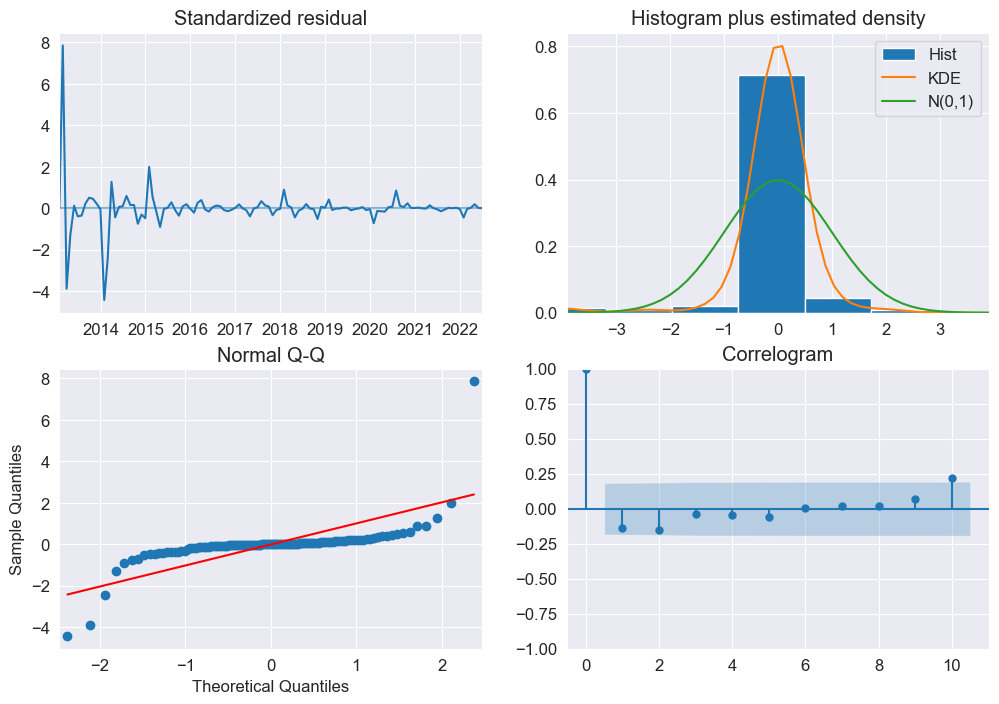

In [51]:
model_6.plot_diagnostics(figsize=(12, 8))
plt.show()

Mean Squared Error: 6.478546627765262e-10
Mean Absolute Percentage Error: 15.493%


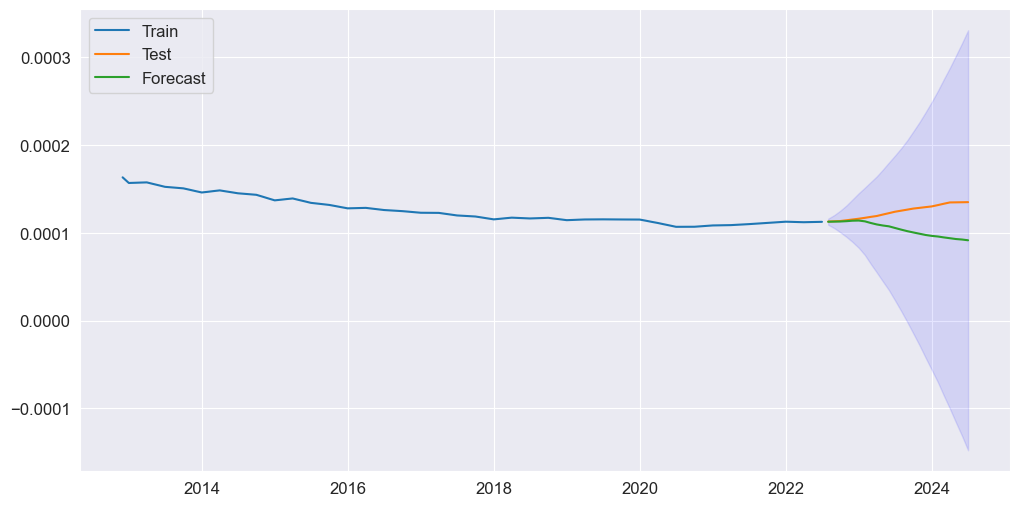

In [52]:
forecast_6, conf_int_6 = model_6.predict(n_periods=len(test_y), X=test_X, return_conf_int=True, alpha=0.05)

print(f"Mean Squared Error: {mean_squared_error(test_y, forecast_6)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(test_y, forecast_6):.3f}%")

plt.figure(figsize=(12, 6))
plt.plot(train_y, label='Train')
plt.plot(test_y, label='Test')
plt.plot(test_y.index, forecast_6, label='Forecast')
plt.fill_between(test_y.index, conf_int_6[:, 0], conf_int_6[:, 1], color='b', alpha=0.1)
plt.legend()

#### ARDL

In [53]:
y = df_epargne['Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'].copy()
X = df_taux['Taux de rémunération annuel des livrets ordinaires'].copy()
normalizer_series = df_macro['Agregats monetaires France, M2'].copy()

y = y / normalizer_series

df = pd.concat([y , X], axis=1)
df.columns = ['y', 'X']

date_initial = '2012-03-01' 
date_end = '2024-07-01'

df = df.loc[ (date_initial < df.index) & (df.index < date_end)]
df = df.interpolate(method='linear', limit_direction='both')

y = df['y']
X = df['X']
df.head()

,y,X
2012-03-31,0.000175,1.99
2012-04-30,0.000175,1.99
2012-05-31,0.000175,1.95
2012-06-30,0.000175,1.97
2012-07-31,0.000175,1.97


In [54]:
from statsmodels.tsa.ardl import ARDL

train_size = len(y) - 12 * 1
train_y, test_y = y[:train_size], y[train_size:]
train_X, test_X = X[:train_size], X[train_size:]

lag_x = 0
lag_y = 4

model_7 = ARDL(train_y, lag_y, pd.DataFrame(train_X), lag_x)
res_7 = model_7.fit()
print(res_7.summary())

                              ARDL Model Results                              
Dep. Variable:                      y   No. Observations:                  136
Model:                     ARDL(4, 0)   Log Likelihood                1677.233
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Sat, 01 Feb 2025   AIC                          -3340.467
Time:                        23:22:05   BIC                          -3320.287
Sample:                    07-31-2012   HQIC                         -3332.267
                         - 06-30-2023                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.375e-05   2.28e-06      6.039      0.000    9.25e-06    1.83e-05
y.L1           1.4682      0.079     18.499      0.000       1.311       1.625
y.L2          -0.5292      0.148     -3.584      0.0

c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 3.8841723862260423e-10
Mean Absolute Percentage Error: 14.405%


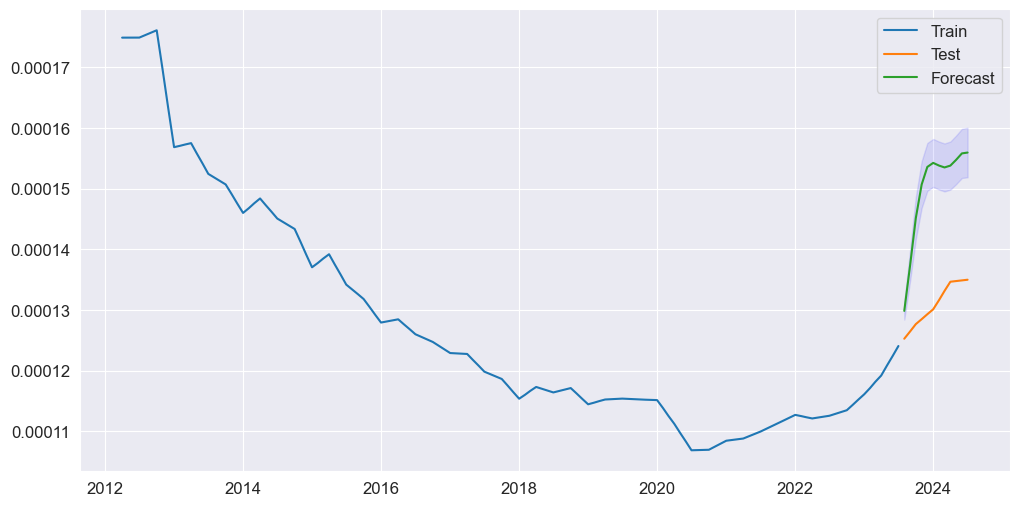

In [55]:
forecast_7 = res_7.get_prediction(start=len(train_y), end=len(train_y) + len(test_y) - 1, exog_oos=pd.DataFrame(X))

print(f"Mean Squared Error: {mean_squared_error(test_y, forecast_7.predicted_mean)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(test_y, forecast_7.predicted_mean):.3f}%")

plt.figure(figsize=(12, 6))
plt.plot(train_y, label='Train')
plt.plot(test_y, label='Test')
plt.plot(test_y.index, forecast_7.predicted_mean, label='Forecast')
plt.fill_between(test_y.index, forecast_7.conf_int().iloc[:, 0], forecast_7.conf_int().iloc[:, 1], color='b', alpha=0.1)
plt.legend()


I want to try using as exogenous variable the **PIB**

We use special day for the lags for the PIB

In [56]:
steps_to_predict = int( 12 * 2 )

In [57]:
y = df_epargne['Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'].copy()
#X = df_taux['Taux de rémunération annuel des livrets ordinaires'].copy()
PIB = df_macro['France, PIB en PPA'].copy()

y = y
df = pd.concat([y , PIB], axis=1)
df.columns = ['y', 'PIB']

date_initial = '2012-03-01' 
date_end = '2024-07-01'

df = df.loc[ (date_initial < df.index) & (df.index < date_end)]
df = df.interpolate(method='linear', limit_direction='both') 

pib_lags = [6, 12]
df_lag = df.copy()

for i in pib_lags:
    df_lag[f"PIB_lag_{i}"] = df_lag['PIB'].shift(i)
    
df_lag.dropna(inplace=True)
df_lag.head()

y = df_lag['y']
X = df_lag.drop(columns='y')
df_lag.head()

,y,PIB,PIB_lag_6,PIB_lag_12
2013-03-31,250.299000,1833.913750,1826.497500,1826.4675
2013-04-30,248.932667,1838.842917,1826.502500,1826.4725
2013-05-31,247.566333,1843.772083,1826.507500,1826.4775
2013-06-30,246.200000,1848.701250,1826.512500,1826.4825
2013-07-31,245.700000,1853.630417,1827.748542,1826.4875


In [58]:
train_size = len(y) - steps_to_predict
train_y, test_y = y[:train_size], y[train_size:]
train_X, test_X = X[:train_size], X[train_size:]

model_8 = pm.auto_arima(train_y, X=train_X,
                        max_p=6, max_q=6, 
                        d=None, stationary=False, 
                        seasonal=True, m=12,
                        stepwise=True, trace=True,
                        n_jobs=-1, suppress_warnings=True, error_action="ignore")

print(model_8.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=144.110, Time=0.83 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=190.698, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=147.745, Time=0.17 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=164.939, Time=0.12 sec
 ARIMA(2,2,2)(0,0,1)[12]             : AIC=160.669, Time=0.65 sec
 ARIMA(2,2,2)(1,0,0)[12]             : AIC=142.032, Time=0.56 sec
 ARIMA(2,2,2)(0,0,0)[12]             : AIC=172.762, Time=0.35 sec
 ARIMA(2,2,2)(2,0,0)[12]             : AIC=144.102, Time=1.20 sec
 ARIMA(2,2,2)(2,0,1)[12]             : AIC=145.717, Time=1.44 sec
 ARIMA(1,2,2)(1,0,0)[12]             : AIC=138.236, Time=0.57 sec
 ARIMA(1,2,2)(0,0,0)[12]             : AIC=186.446, Time=0.20 sec
 ARIMA(1,2,2)(2,0,0)[12]             : AIC=140.232, Time=1.25 sec
 ARIMA(1,2,2)(1,0,1)[12]             : AIC=140.234, Time=0.65 sec
 ARIMA(1,2,2)(0,0,1)[12]             : AIC=157.960, Time=0.43 sec
 ARIMA(1,2,2)(2,0,1)[12]         

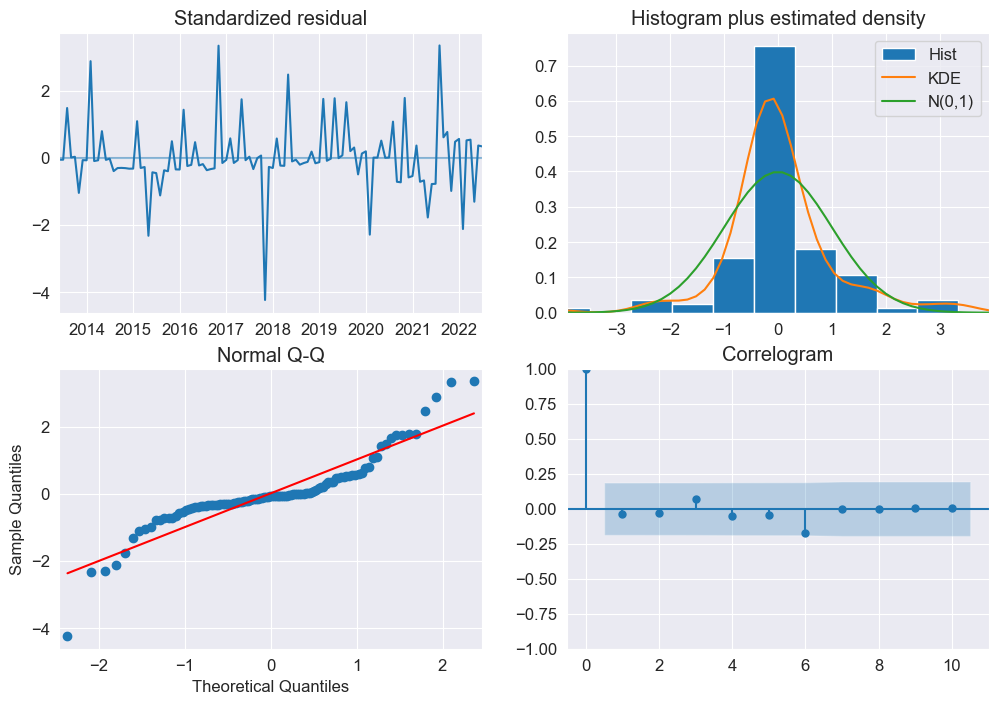

In [59]:
model_8.plot_diagnostics(figsize=(12, 8))
plt.show()

Mean Squared Error: 71.833
Mean Absolute Error: 7.240
Mean Absolute Percentage Error: 1.915%


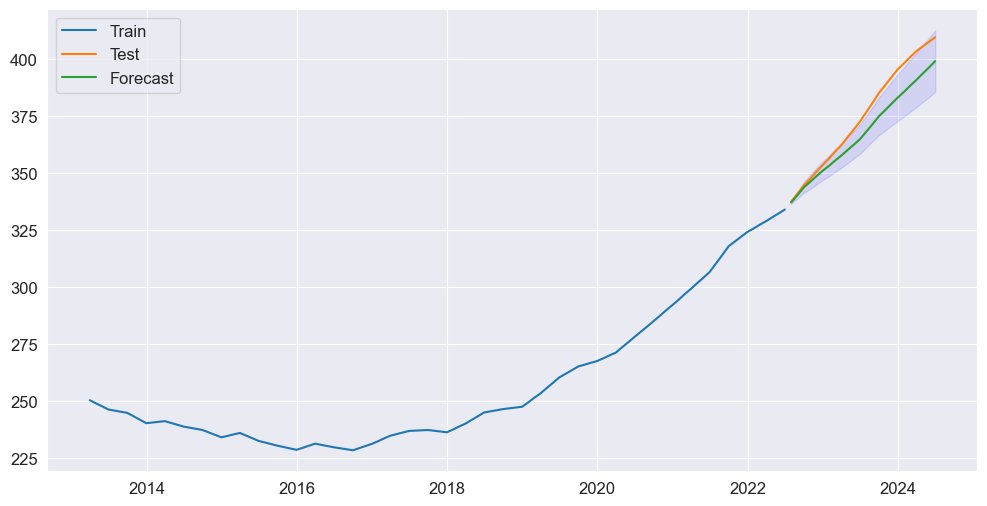

In [60]:
forecast_8, conf_int_8 = model_8.predict(n_periods=len(test_y), X=test_X, return_conf_int=True, alpha=0.05)

display_error(forecast_8, test_y)

plt.figure(figsize=(12, 6))
plt.plot(train_y, label='Train')
plt.plot(test_y, label='Test')
plt.plot(test_y.index, forecast_8, label='Forecast')
plt.fill_between(test_y.index, conf_int_8[:, 0], conf_int_8[:, 1], color='b', alpha=0.1)
plt.legend()
plt.show()

In [61]:
y = df_epargne['Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'].copy()
TAUX = df_taux['Taux de rémunération annuel des livrets ordinaires'].copy()
PIB = df_macro['France, PIB en PPA'].copy()

y = y
df = pd.concat([y , PIB, TAUX], axis=1)
df.columns = ['y', 'PIB', 'Taux']

date_initial = '2012-03-01' 
date_end = '2024-07-01'

df = df.loc[ (date_initial < df.index) & (df.index < date_end)]
df = df.interpolate(method='linear', limit_direction='both')

df_lag = df.copy()
pib_lags = [1,6]
taux_lags = [1, 6]

for i in pib_lags:
    df_lag[f"PIB_lag_{i}"] = df_lag['PIB'].shift(i)
for i in taux_lags:
    df_lag[f"Taux_lag_{i}"] = df_lag['Taux'].shift(i)
    
df_lag.dropna(inplace=True)
df_lag.head()

y = df_lag['y']
X = df_lag.drop(columns='y')
df_lag.head()

,y,PIB,Taux,PIB_lag_1,PIB_lag_6,Taux_lag_1,Taux_lag_6
2012-09-30,271.100000,1826.497500,1.86,1826.4925,1826.4675,1.95,1.99
2012-10-31,264.400000,1826.502500,1.84,1826.4975,1826.4725,1.86,1.99
2012-11-30,257.700000,1826.507500,1.77,1826.5025,1826.4775,1.84,1.95
2012-12-31,251.000000,1826.512500,1.74,1826.5075,1826.4825,1.77,1.97
2013-01-31,250.766333,1827.748542,1.71,1826.5125,1826.4875,1.74,1.97


In [62]:
train_size = len(y) - steps_to_predict
train_y, test_y = y[:train_size], y[train_size:]
train_X, test_X = X[:train_size], X[train_size:]

model_10 = pm.auto_arima(train_y, X=train_X,
                        max_p=6, max_q=6, 
                        d=None, stationary=False, 
                        seasonal=True, m=12,
                        stepwise=True, trace=True,
                        n_jobs=-1, suppress_warnings=True, error_action="ignore")

print(model_10.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=530.272, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1031.107, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1029.269, Time=0.16 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=532.780, Time=0.86 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=524.212, Time=0.80 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=471.109, Time=0.44 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=533.684, Time=0.40 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=476.082, Time=0.43 sec
 ARIMA(3,0,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,0,3)(0,0,0)[12] intercept   : AIC=536.171, Time=0.42 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=411.147, Time=0.32 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=345.918, Time=0.71 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=

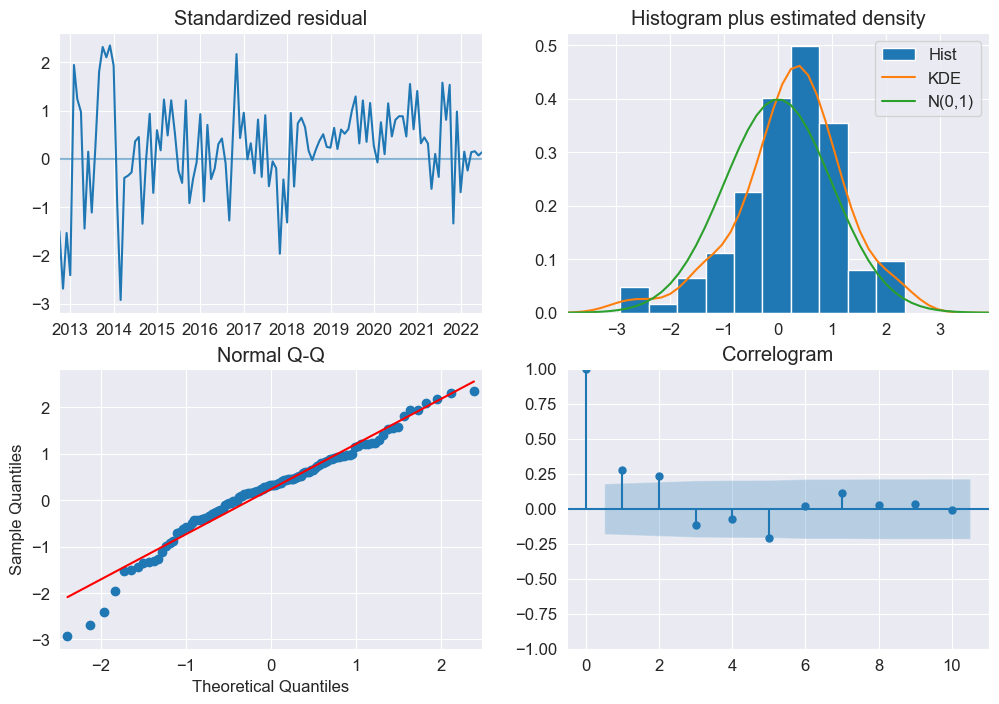

In [63]:
fig = model_10.plot_diagnostics(figsize=(12, 8))
plt.show()

Mean Squared Error: 15.552
Mean Absolute Error: 3.506
Mean Absolute Percentage Error: 0.926%


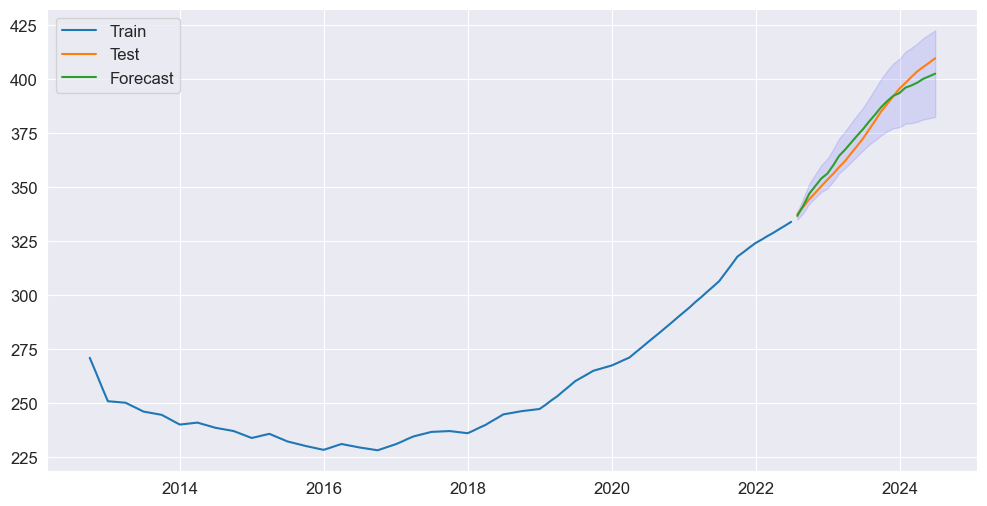

In [64]:
forecast_10, conf_int_10 = model_10.predict(n_periods=len(test_y), X=test_X, return_conf_int=True, alpha=0.05)

display_error(forecast_10, test_y)

plt.figure(figsize=(12, 6))
plt.plot(train_y, label='Train')
plt.plot(test_y, label='Test')
plt.plot(test_y.index, forecast_10, label='Forecast') 
plt.fill_between(test_y.index, conf_int_10[:, 0], conf_int_10[:, 1], color='b', alpha=0.1)
plt.legend()
plt.show()

In [65]:
y = df_epargne['Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'].copy()
df = pd.concat([y], axis=1)
df.columns = ['y']

date_initial = '2012-03-01' 
date_end = '2024-07-01'

df = df.loc[ (date_initial < df.index) & (df.index < date_end)]
df = df.resample('M').interpolate(method='linear')

y = df['y']

df.head()

,y
Time,
2012-03-31,266.3
2012-04-30,266.7
2012-05-31,267.1
2012-06-30,267.5
2012-07-31,268.7


In [66]:
train_size = len(y) - steps_to_predict
train_y, test_y = y[:train_size], y[train_size:]

model_9 = pm.auto_arima(train_y,
                        max_p=6, max_q=6, 
                        d=None, stationary=False, 
                        seasonal=True, m=12,
                        stepwise=True, trace=True,
                        n_jobs=-1, suppress_warnings=True, error_action="ignore")

print(model_9.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=324.605, Time=0.67 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=365.229, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=335.931, Time=0.05 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(2,2,2)(0,0,1)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(2,2,2)(1,0,0)[12]             : AIC=322.638, Time=0.46 sec
 ARIMA(2,2,2)(0,0,0)[12]             : AIC=373.229, Time=0.05 sec
 ARIMA(2,2,2)(2,0,0)[12]             : AIC=324.588, Time=0.93 sec
 ARIMA(2,2,2)(2,0,1)[12]             : AIC=inf, Time=1.11 sec
 ARIMA(1,2,2)(1,0,0)[12]             : AIC=319.869, Time=0.34 sec
 ARIMA(1,2,2)(0,0,0)[12]             : AIC=371.229, Time=0.02 sec
 ARIMA(1,2,2)(2,0,0)[12]             : AIC=321.816, Time=0.63 sec
 ARIMA(1,2,2)(1,0,1)[12]             : AIC=321.838, Time=0.46 sec
 ARIMA(1,2,2)(0,0,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(1,2,2)(2,0,1)[12]             : AIC=inf, T

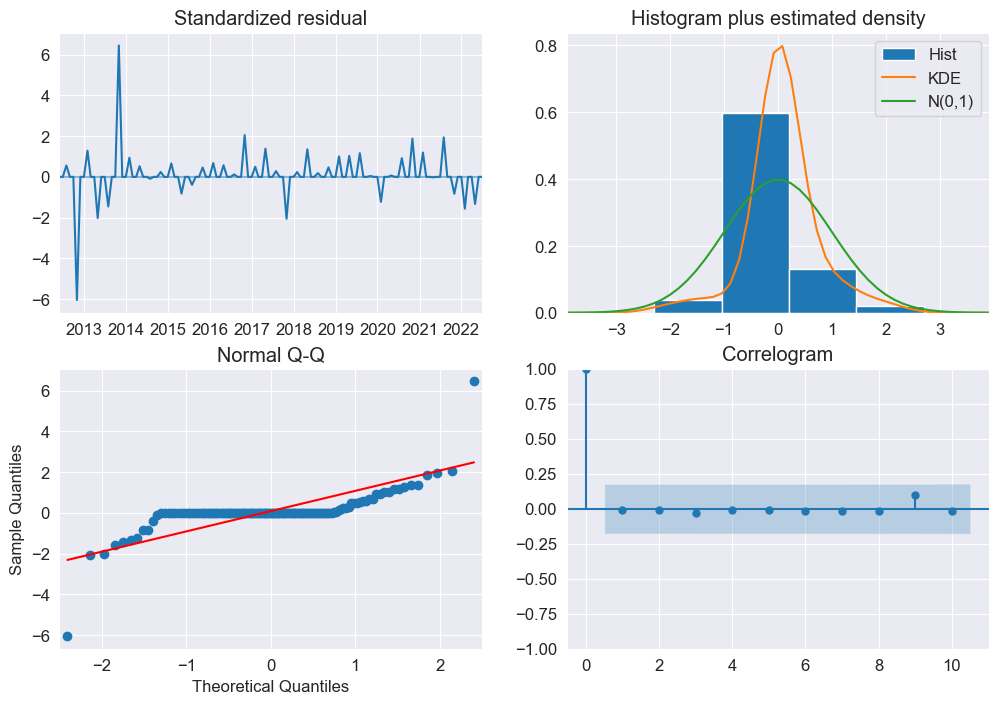

In [67]:
fig = model_9.plot_diagnostics(figsize=(12, 8))

Mean Squared Error: 142.460
Mean Absolute Error: 9.798
Mean Absolute Percentage Error: 2.605%


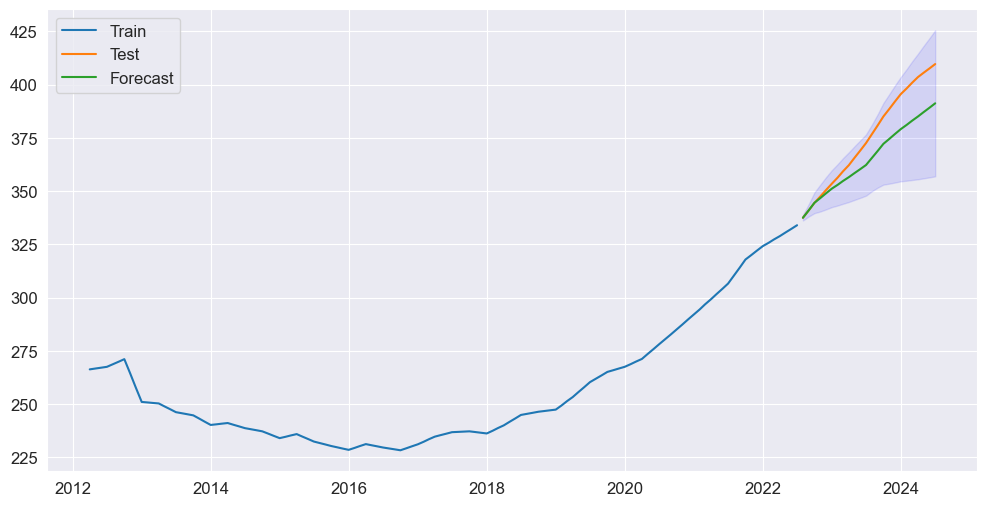

In [68]:
forecast_9, conf_int_9 = model_9.predict(n_periods=len(test_y), return_conf_int=True, alpha=0.05)

display_error(forecast_9, test_y)

plt.figure(figsize=(12, 6))
plt.plot(train_y, label='Train')
plt.plot(test_y, label='Test')
plt.plot(test_y.index, forecast_9, label='Forecast')
plt.fill_between(test_y.index, conf_int_9[:, 0], conf_int_9[:, 1], color='b', alpha=0.1)
plt.legend()
plt.show()

In [69]:
y = df_epargne['Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'].copy()
TAUX = df_taux['Taux de rémunération annuel des livrets ordinaires'].copy()
M2 = df_macro['Agregats monetaires France, M2'].copy()

df = pd.concat([y , M2, TAUX], axis=1)
df.columns = ['y', 'M2', 'Taux']

date_initial = '2012-03-01' 
date_end = '2024-07-01'

df = df.loc[ (date_initial < df.index) & (df.index < date_end)]
df = df.interpolate(method='linear', limit_direction='both')

df_lag = df.copy()
m2_lags = [1, 6]
taux_lags = [1, 6]

for i in m2_lags:
    df_lag[f"M2_lag_{i}"] = df_lag['M2'].shift(i)
for i in taux_lags:
    df_lag[f"Taux_lag_{i}"] = df_lag['Taux'].shift(i)
    
df_lag.dropna(inplace=True)
df_lag.head()

y = df_lag['y']
X = df_lag.drop(columns='y')
df_lag.head()

,y,M2,Taux,M2_lag_1,M2_lag_6,Taux_lag_1,Taux_lag_6
2012-09-30,271.100000,1539448.0,1.86,1541508.0,1522689.0,1.95,1.99
2012-10-31,264.400000,1545199.0,1.84,1539448.0,1522915.0,1.86,1.99
2012-11-30,257.700000,1537572.0,1.77,1545199.0,1526655.0,1.84,1.95
2012-12-31,251.000000,1600459.0,1.74,1537572.0,1529485.0,1.77,1.97
2013-01-31,250.766333,1577523.0,1.71,1600459.0,1552507.0,1.74,1.97


In [70]:
train_size = len(y) - steps_to_predict
train_y, test_y = y[:train_size], y[train_size:]
train_X, test_X = X[:train_size], X[train_size:]

model_11 = pm.auto_arima(y, X=X,
                        max_p=6, max_q=6, 
                        d=None, stationary=False, 
                        seasonal=True, m=12,
                        stepwise=True, trace=True,
                        n_jobs=-1, suppress_warnings=True, error_action="ignore")

print(model_11.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=673.579, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=924.739, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=689.589, Time=0.63 sec


c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=935.625, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1485.470, Time=0.07 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=667.303, Time=0.80 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=667.180, Time=0.39 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=682.673, Time=0.75 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=666.277, Time=4.18 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=682.591, Time=8.49 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=666.253, Time=8.36 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=673.056, Time=0.92 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=847.057, Time=1.66 sec
 ARIMA(1,0,2)(1,0,2)[12] intercept   : AIC=738.450, Time=1.89 sec


c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


 ARIMA(0,0,2)(0,0,1)[12] intercept   : AIC=970.215, Time=0.35 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=666.388, Time=0.71 sec
 ARIMA(1,0,3)(0,0,1)[12] intercept   : AIC=670.208, Time=0.87 sec
 ARIMA(0,0,3)(0,0,1)[12] intercept   : AIC=816.178, Time=4.68 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=666.572, Time=0.59 sec
 ARIMA(2,0,3)(0,0,1)[12] intercept   : AIC=1582.652, Time=0.80 sec
 ARIMA(1,0,2)(0,0,1)[12]             : AIC=664.613, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[12]             : AIC=664.612, Time=0.13 sec
 ARIMA(1,0,2)(1,0,0)[12]             : AIC=680.831, Time=0.27 sec
 ARIMA(1,0,2)(1,0,1)[12]             : AIC=671.145, Time=0.34 sec
 ARIMA(0,0,2)(0,0,0)[12]             : AIC=964.877, Time=0.16 sec


c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(0,0,0)[12]             : AIC=664.510, Time=0.14 sec
 ARIMA(1,0,1)(1,0,0)[12]             : AIC=679.827, Time=0.26 sec
 ARIMA(1,0,1)(0,0,1)[12]             : AIC=664.648, Time=0.24 sec
 ARIMA(1,0,1)(1,0,1)[12]             : AIC=670.869, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=930.748, Time=0.13 sec


c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,0)(0,0,0)[12]             : AIC=674.442, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[12]             : AIC=664.573, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[12]             : AIC=662.497, Time=0.19 sec
 ARIMA(2,0,0)(1,0,0)[12]             : AIC=677.955, Time=0.32 sec
 ARIMA(2,0,0)(0,0,1)[12]             : AIC=662.600, Time=0.24 sec
 ARIMA(2,0,0)(1,0,1)[12]             : AIC=668.912, Time=0.36 sec
 ARIMA(3,0,0)(0,0,0)[12]             : AIC=664.547, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[12]             : AIC=666.565, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=664.346, Time=0.38 sec

Best model:  ARIMA(2,0,0)(0,0,0)[12]          
Total fit time: 42.029 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  142
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -322.248
Date:                Sat, 01 Feb 2025   AIC                            662.497
Time:      

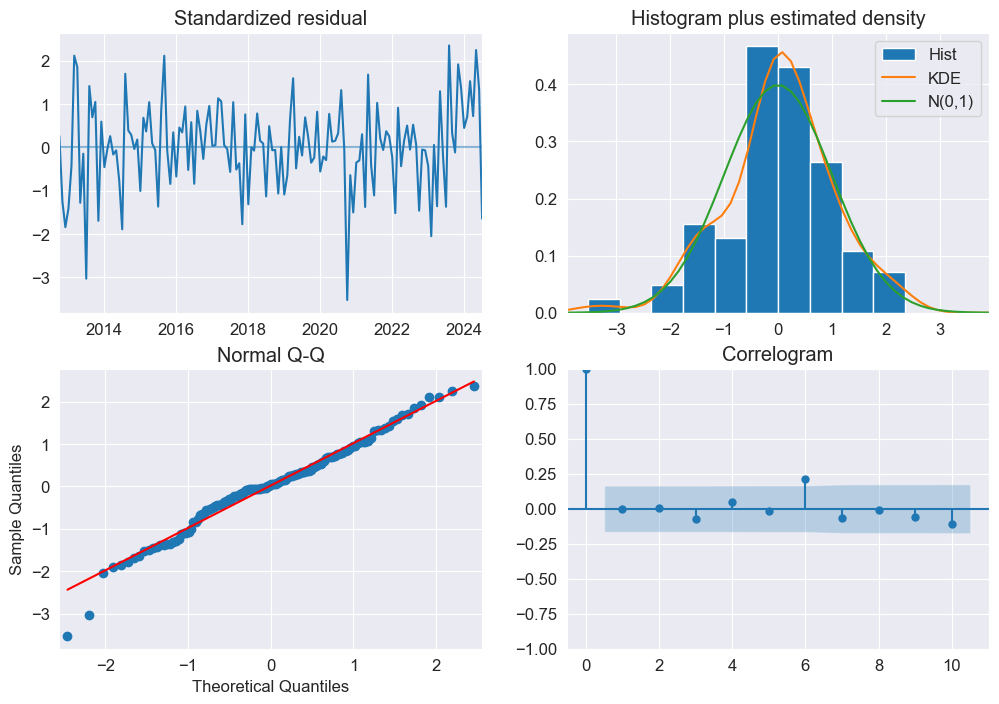

In [71]:
fig = model_11.plot_diagnostics(figsize=(12, 8))

Mean Squared Error: 130.357
Mean Absolute Error: 10.308
Mean Absolute Percentage Error: 2.742%


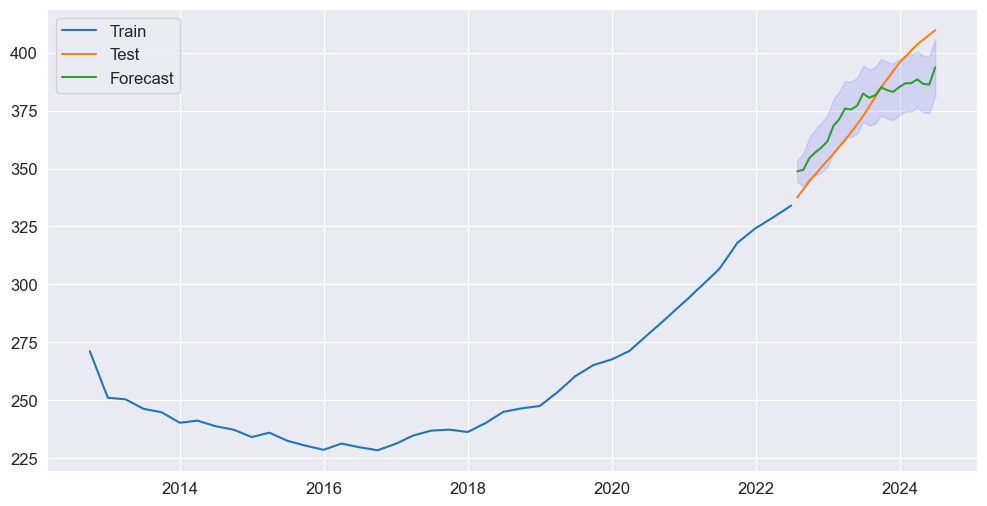

In [72]:
forecast_11, conf_int_11 = model_11.predict(n_periods=len(test_y), X=test_X, return_conf_int=True, alpha=0.05)
display_error(forecast_11, test_y)
plt.figure(figsize=(12, 6))
plt.plot(train_y, label='Train')
plt.plot(test_y, label='Test')
plt.plot(test_y.index, forecast_11, label='Forecast')
plt.fill_between(test_y.index, conf_int_11[:, 0], conf_int_11[:, 1], color='b', alpha=0.1)
plt.legend()
plt.show()

In [73]:
y = df_epargne['Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'].copy()
TAUX = df_taux['Taux de rémunération annuel des livrets ordinaires'].copy()
M2 = df_macro['Agregats monetaires France, M2'].copy()
PIB = df_macro['France, PIB en PPA'].copy()

df = pd.concat([y , M2, TAUX, PIB], axis=1)
df.columns = ['y', 'M2', 'Taux', 'PIB']

date_initial = '2012-03-01' 
date_end = '2024-07-01'

df = df.loc[ (date_initial < df.index) & (df.index < date_end)]
df = df.interpolate(method='linear', limit_direction='both')

df_lag = df.copy()
m2_lags = [1, 6, 12]
taux_lags = [1, 6, 12]
pib_lags = [1]

for i in m2_lags:
    df_lag[f"M2_lag_{i}"] = df_lag['M2'].shift(i)
for i in taux_lags:
    df_lag[f"Taux_lag_{i}"] = df_lag['Taux'].shift(i)
for i in pib_lags:
    df_lag[f"PIB_lag_{i}"] = df_lag['PIB'].shift(i)
    
df_lag.dropna(inplace=True)
df_lag.head()

y = df_lag['y']
X = df_lag.drop(columns='y')

train_size = len(y) - steps_to_predict
train_y, test_y = y[:train_size], y[train_size:]
train_X, test_X = X[:train_size], X[train_size:] 

df_lag.head()

,y,M2,Taux,PIB,M2_lag_1,M2_lag_6,M2_lag_12,Taux_lag_1,Taux_lag_6,Taux_lag_12,PIB_lag_1
2013-03-31,250.299000,1589268.0,1.48,1833.913750,1567548.0,1539448.0,1522689.0,1.52,1.86,1.99,1830.215625
2013-04-30,248.932667,1617403.0,1.47,1838.842917,1589268.0,1545199.0,1522915.0,1.48,1.84,1.99,1833.913750
2013-05-31,247.566333,1610531.0,1.46,1843.772083,1617403.0,1537572.0,1526655.0,1.47,1.77,1.95,1838.842917
2013-06-30,246.200000,1615217.0,1.45,1848.701250,1610531.0,1600459.0,1529485.0,1.46,1.74,1.97,1843.772083
2013-07-31,245.700000,1627751.0,1.45,1853.630417,1615217.0,1577523.0,1552507.0,1.45,1.71,1.97,1848.701250


In [74]:
model_12 = pm.auto_arima(train_y, X=train_X,
                        max_p=6, max_q=6, 
                        d=None, stationary=False, 
                        seasonal=True, m=12,
                        stepwise=True, trace=True,
                        n_jobs=-1, suppress_warnings=True, error_action="ignore")

print(model_12.summary())

Performing stepwise search to minimize aic


c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1901: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=637.597, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=517.066, Time=0.10 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=427.144, Time=0.31 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=538.394, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=932.538, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=425.540, Time=0.11 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=417.670, Time=0.26 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=421.702, Time=0.31 sec


c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=429.540, Time=0.52 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=529.108, Time=0.23 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=415.413, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=419.831, Time=0.14 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=419.053, Time=0.34 sec


c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,0)(0,0,2)[12] intercept   : AIC=423.831, Time=0.57 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=421.511, Time=0.34 sec
 ARIMA(2,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(3,0,0)(0,0,1)[12] intercept   : AIC=417.379, Time=0.31 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=417.227, Time=0.33 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=415.466, Time=0.32 sec
 ARIMA(3,0,1)(0,0,1)[12] intercept   : AIC=419.235, Time=0.33 sec
 ARIMA(2,0,0)(0,0,1)[12]             : AIC=413.400, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[12]             : AIC=417.819, Time=0.12 sec
 ARIMA(2,0,0)(1,0,1)[12]             : AIC=417.041, Time=0.32 sec


c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,0)(0,0,2)[12]             : AIC=421.819, Time=0.53 sec
 ARIMA(2,0,0)(1,0,0)[12]             : AIC=419.499, Time=0.28 sec
 ARIMA(2,0,0)(1,0,2)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(1,0,0)(0,0,1)[12]             : AIC=415.632, Time=0.25 sec
 ARIMA(3,0,0)(0,0,1)[12]             : AIC=415.373, Time=0.28 sec
 ARIMA(2,0,1)(0,0,1)[12]             : AIC=415.223, Time=0.28 sec
 ARIMA(1,0,1)(0,0,1)[12]             : AIC=413.464, Time=0.29 sec
 ARIMA(3,0,1)(0,0,1)[12]             : AIC=417.231, Time=0.33 sec

Best model:  ARIMA(2,0,0)(0,0,1)[12]          
Total fit time: 10.473 seconds
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  112
Model:             SARIMAX(2, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -192.700
Date:                              Sat, 01 Feb 2025   AIC                            413.400
Time:                    

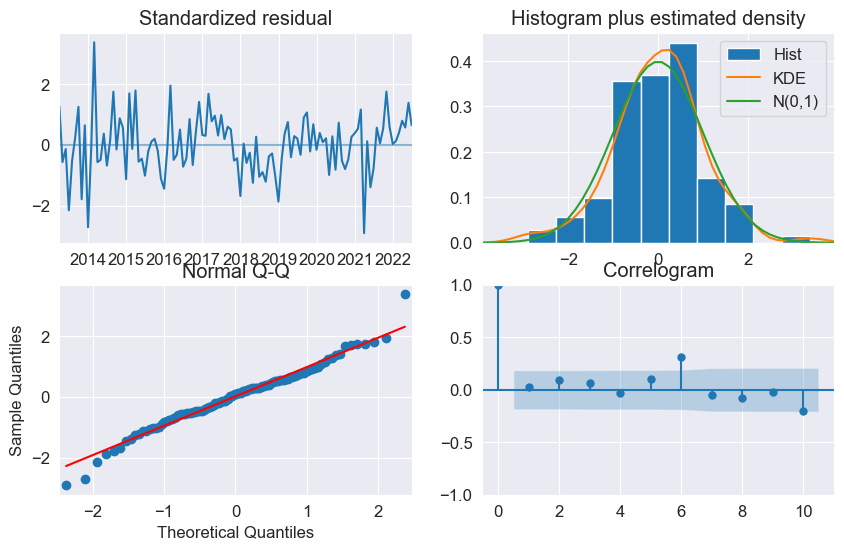

In [75]:
fig = model_12.plot_diagnostics(figsize=(10, 6))

Mean Squared Error: 409.188
Mean Absolute Error: 17.180
Mean Absolute Percentage Error: 4.704%


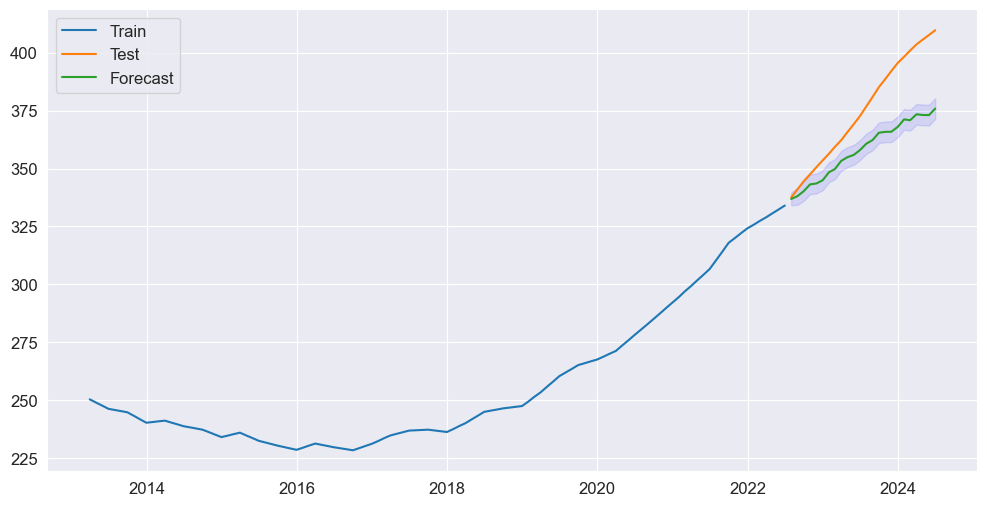

In [76]:
forecast_12, conf_int_12 = model_12.predict(n_periods=len(test_y), X=test_X, return_conf_int=True, alpha=0.05)
display_error(forecast_12, test_y)
plt.figure(figsize=(12, 6))
plt.plot(train_y, label='Train')
plt.plot(test_y, label='Test')
plt.plot(test_y.index, forecast_12, label='Forecast')
plt.fill_between(test_y.index, conf_int_12[:, 0], conf_int_12[:, 1], color='b', alpha=0.1)
plt.legend()
plt.show()

## Testing with dividing by the M2

In [77]:
steps_to_predict = int( 12 * 2 )

In [78]:
y = df_epargne['Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'].copy()
M2 = df_macro['Agregats monetaires France, M2'].copy()

df = pd.concat([y , M2], axis=1)
df.columns = ['y', 'M2']

date_initial = '2012-03-01' 
date_end = '2024-07-01'

df = df.loc[ (date_initial < df.index) & (df.index < date_end)]
df = df.interpolate(method='linear', limit_direction='both')

df['y'] = df['y'] / df['M2']
df.drop(columns='M2', inplace=True)

y = df['y'] / df['y'].mean()  # Normalizing the series

train_size = len(y) - steps_to_predict
train_y, test_y = y[:train_size], y[train_size:]
train_X, test_X = X[:train_size], X[train_size:] 

y.head()

2012-03-31    1.366577
2012-04-30    1.368426
2012-05-31    1.367121
2012-06-30    1.366635
2012-07-31    1.352409
Freq: ME, Name: y, dtype: float64

In [79]:
model_13 = pm.auto_arima(train_y,
                        max_p=12, max_q=12, 
                        d=None, stationary=False, 
                        seasonal=True, m=12,
                        stepwise=True, trace=True,
                        n_jobs=-1, suppress_warnings=True, error_action="ignore")

print(model_13.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=-747.656, Time=0.65 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=-639.407, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=-713.953, Time=0.10 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=-727.111, Time=0.35 sec
 ARIMA(2,2,2)(0,0,1)[12]             : AIC=-722.068, Time=0.47 sec
 ARIMA(2,2,2)(1,0,0)[12]             : AIC=-737.144, Time=0.21 sec
 ARIMA(2,2,2)(2,0,1)[12]             : AIC=-744.924, Time=0.92 sec
 ARIMA(2,2,2)(1,0,2)[12]             : AIC=-745.045, Time=1.05 sec
 ARIMA(2,2,2)(0,0,0)[12]             : AIC=-705.092, Time=0.11 sec
 ARIMA(2,2,2)(0,0,2)[12]             : AIC=-729.330, Time=1.09 sec
 ARIMA(2,2,2)(2,0,0)[12]             : AIC=-745.283, Time=0.95 sec
 ARIMA(2,2,2)(2,0,2)[12]             : AIC=-741.075, Time=1.57 sec
 ARIMA(1,2,2)(1,0,1)[12]             : AIC=-746.267, Time=0.53 sec
 ARIMA(2,2,1)(1,0,1)[12]             : AIC=-747.813, Time=0.39 sec
 ARIMA(2,2,1)(0,0,1

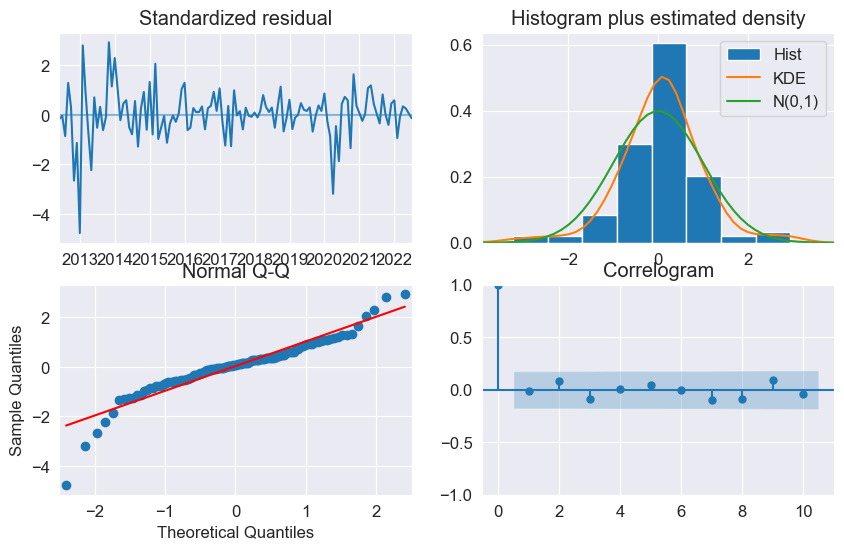

In [80]:
fig = model_13.plot_diagnostics(figsize=(10, 6))

Mean Squared Error: 0.0059
Mean Absolute Error: 0.0627
Mean Absolute Percentage Error: 6.7721%


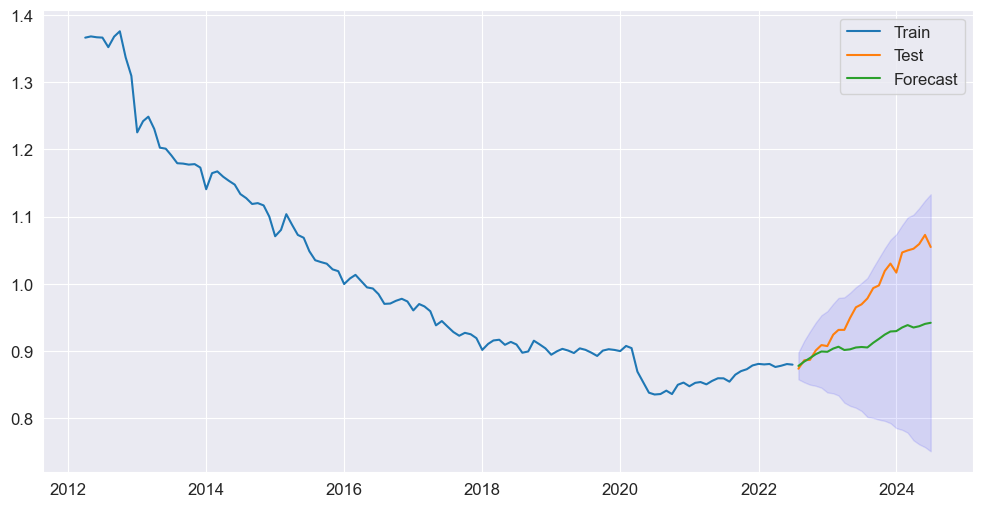

In [81]:
forecast_13, conf_int_13 = model_13.predict(n_periods=len(test_y), return_conf_int=True, alpha=0.05)
display_error(forecast_13, test_y, decimals=4)
plt.figure(figsize=(12, 6))
plt.plot(train_y, label='Train')
plt.plot(test_y, label='Test')
plt.plot(test_y.index, forecast_13, label='Forecast')
plt.fill_between(test_y.index, conf_int_13[:, 0], conf_int_13[:, 1], color='b', alpha=0.1)
plt.legend()
plt.show()

In [82]:
y = df_epargne['Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'].copy()
TAUX = df_taux['Taux de rémunération annuel des livrets ordinaires'].copy()
M2 = df_macro['Agregats monetaires France, M2'].copy()

df = pd.concat([y , M2, TAUX], axis=1)
df.columns = ['y', 'M2', 'Taux']

date_initial = '2012-03-01' 
date_end = '2024-07-01'

df = df.loc[ (date_initial < df.index) & (df.index < date_end)]
df = df.interpolate(method='linear', limit_direction='both')

df_lag = df.copy()
taux_lags = np.arange(1, 7)

for i in taux_lags:
    df_lag[f"Taux_lag_{i}"] = df_lag['Taux'].shift(i)
    
df_lag.dropna(inplace=True)
df_lag.head()

y = df_lag['y'] / df_lag['M2']
X = df_lag.drop(columns=['y', 'M2'])

y = y / y.mean() # Normalizing the series

train_size = len(y) - steps_to_predict
train_y, test_y = y[:train_size], y[train_size:]
train_X, test_X = X[:train_size], X[train_size:] 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-708.400, Time=1.48 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-565.434, Time=0.24 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-632.195, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=218.482, Time=0.06 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-695.737, Time=3.03 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-529.278, Time=1.58 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=-579.570, Time=3.05 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=-475.179, Time=2.86 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-688.743, Time=0.63 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=-706.817, Time=2.50 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=-727.441, Time=2.51 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=-709.510, Time=1.57 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=-460.388, Time=1.83 sec
 ARIMA(3,0,2)(2,0,0)[12] 

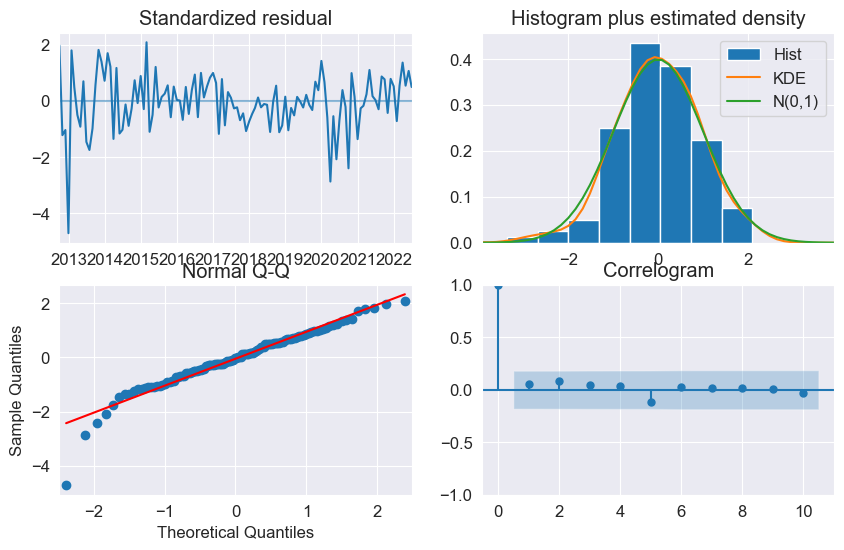

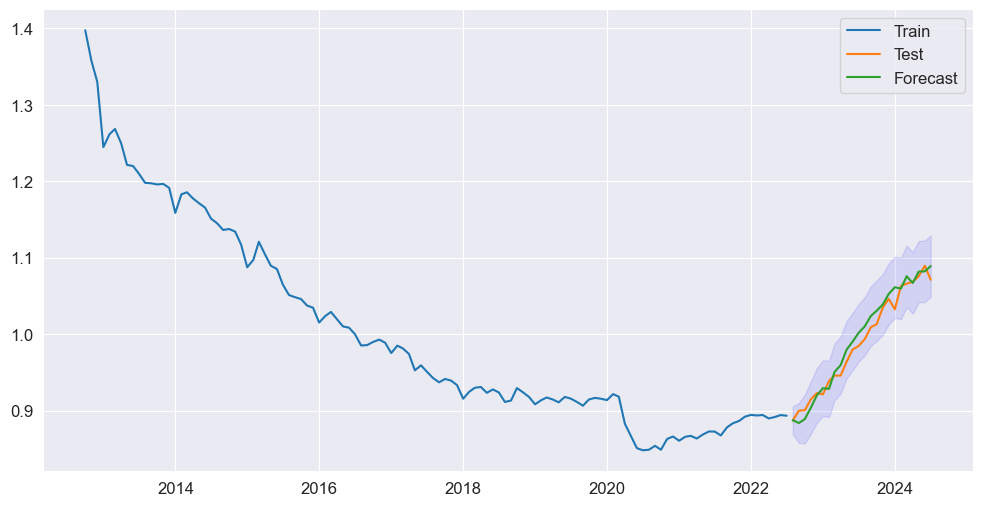

In [83]:
model_14 = pm.auto_arima(train_y, X=train_X,
                        max_p=6, max_q=6, 
                        d=None, stationary=False, 
                        seasonal=True, m=12,
                        stepwise=True, trace=True,
                        n_jobs=-1, suppress_warnings=True, error_action="ignore")

print(model_14.summary())

fig = model_14.plot_diagnostics(figsize=(10, 6))

forecast_14, conf_int_14 = model_14.predict(n_periods=len(test_y), X=test_X, return_conf_int=True, alpha=0.05)
display_error(forecast_14, test_y, decimals=5)
plt.figure(figsize=(12, 6))
plt.plot(train_y, label='Train')
plt.plot(test_y, label='Test')
plt.plot(test_y.index, forecast_14, label='Forecast')
plt.fill_between(test_y.index, conf_int_14[:, 0], conf_int_14[:, 1], color='b', alpha=0.1)
plt.legend()
plt.show()

# Cross validation

In [84]:
y = df_epargne['Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'].copy()
TAUX = df_taux['Taux de rémunération annuel des livrets ordinaires'].copy()
M2 = df_macro['Agregats monetaires France, M2'].copy()

df = pd.concat([y , M2, TAUX], axis=1)
df.columns = ['y', 'M2', 'Taux']

date_initial = '2012-03-01' 
date_end = '2024-07-01'

df = df.loc[ (date_initial < df.index) & (df.index < date_end)]
df = df.interpolate(method='linear', limit_direction='both')

df_lag = df.copy()
taux_lags = np.arange(1, 7)

for i in taux_lags:
    df_lag[f"Taux_lag_{i}"] = df_lag['Taux'].shift(i)
    
df_lag.dropna(inplace=True)
df_lag.head()

df_lag['y'] = df_lag['y'] / df_lag['M2']
df_lag['y'] = df_lag['y'] / df_lag['y'].mean()  # Normalizing the series
df_lag.drop(columns='M2', inplace=True)

df_lag.head()

,y,Taux,Taux_lag_1,Taux_lag_2,Taux_lag_3,Taux_lag_4,Taux_lag_5,Taux_lag_6
2012-09-30,1.397612,1.86,1.95,1.97,1.97,1.95,1.99,1.99
2012-10-31,1.357998,1.84,1.86,1.95,1.97,1.97,1.95,1.99
2012-11-30,1.330151,1.77,1.84,1.86,1.95,1.97,1.97,1.95
2012-12-31,1.244661,1.74,1.77,1.84,1.86,1.95,1.97,1.97
2013-01-31,1.261582,1.71,1.74,1.77,1.84,1.86,1.95,1.97


In [85]:
from sklearn.model_selection import TimeSeriesSplit

splits = 3
tss = TimeSeriesSplit(n_splits=splits, test_size = 24, gap=0)

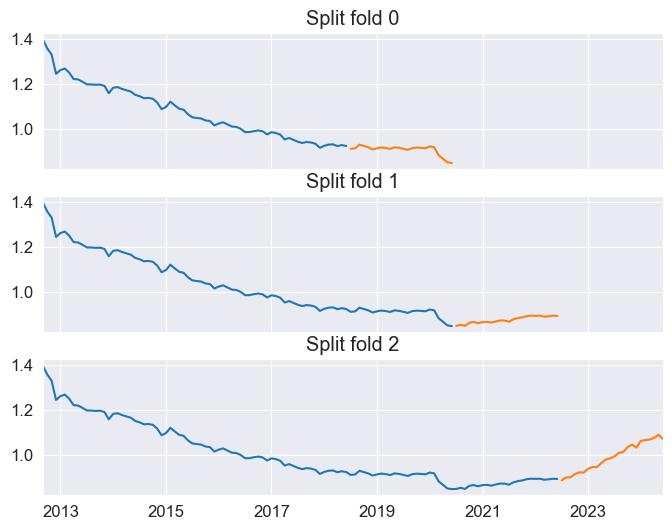

In [86]:
fig, axs = plt.subplots(splits, 1, figsize=(8, 6), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df_lag):
    train = df_lag.iloc[train_idx]
    test = df_lag.iloc[val_idx]
    
    train['y'].plot(ax=axs[fold], label='Training set', title=f"Split fold {fold}")
    test['y'].plot(ax=axs[fold], label='Validation set')
    fold += 1
    

In [87]:
df_lag.head(1)

,y,Taux,Taux_lag_1,Taux_lag_2,Taux_lag_3,Taux_lag_4,Taux_lag_5,Taux_lag_6
2012-09-30,1.397612,1.86,1.95,1.97,1.97,1.95,1.99,1.99


In [88]:
preds = []
reals = []
score_mse = []
score_mape = []
conf_intervals = []

for train_idx, val_idx in tss.split(df_lag):
    train = df_lag.iloc[train_idx]
    test = df_lag.iloc[val_idx]
    
    train_y, test_y = train['y'], test['y']
    train_X, test_X = train.drop(columns=['y']), test.drop(columns=['y'])
    
    model = pm.auto_arima(train_y, X=train_X,
                            max_p=6, max_q=6, 
                            d=None, stationary=False, 
                            seasonal=True, m=12,
                            stepwise=True, trace=True,
                            n_jobs=-1, suppress_warnings=True, error_action="ignore", 
                            )
    
    forecast, conf_int = model.predict(n_periods=len(test_y), X=test_X, return_conf_int=True, alpha=0.05)
    preds.append(forecast)
    reals.append(test_y)
    conf_intervals.append(conf_int)
    score_mse.append(mean_squared_error(test_y, forecast))
    score_mape.append(mean_absolute_percentage_error(test_y, forecast)) 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-358.610, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-343.053, Time=0.17 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-371.083, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=98.110, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-370.153, Time=0.30 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-374.010, Time=0.81 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-363.822, Time=0.51 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=-358.669, Time=1.37 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-368.618, Time=1.21 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=-370.878, Time=1.21 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=-367.844, Time=1.56 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-305.989, Time=0.66 sec
 ARIMA(1,0,1)(1,0,1)[12] interc

Mean Squared Error: 0.000382
Mean Absolute Percentage Error: 1.688629%


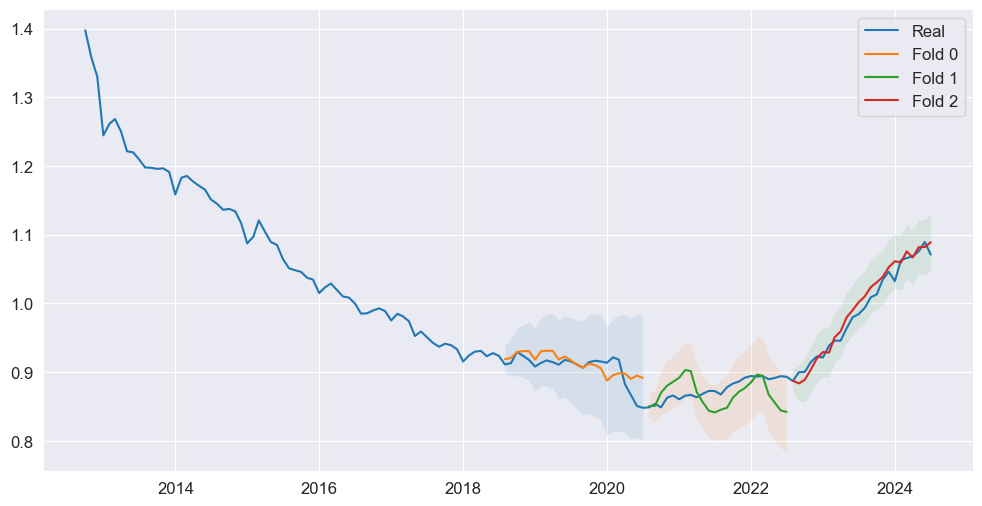

In [89]:
print(f"Mean Squared Error: {np.mean(score_mse):.6f}")
print(f"Mean Absolute Percentage Error: {np.mean(score_mape):.6f}%")

plt.figure(figsize=(12, 6))
plt.plot(df_lag['y'], label='Real')
for i, (real, pred) in enumerate(zip(reals, preds)):
    plt.plot(real.index, pred, label=f'Fold {i}')
    plt.fill_between(real.index, conf_intervals[i][:, 0], conf_intervals[i][:, 1], alpha=0.1)
plt.legend()
plt.show()

# Working with ARDL

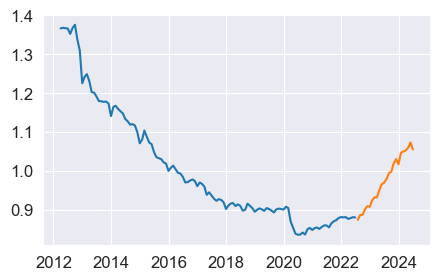

In [90]:
y = df_epargne['Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'].copy()
TAUX = df_taux['Taux de rémunération annuel des livrets ordinaires'].copy()
M2 = df_macro['Agregats monetaires France, M2'].copy()

df = pd.concat([y , M2, TAUX], axis=1)
df.columns = ['y', 'M2', 'Taux']

date_initial = '2012-03-01' 
date_end = '2024-07-01'

df = df.loc[ (date_initial < df.index) & (df.index < date_end)]
df = df.interpolate(method='linear', limit_direction='both')

y = df['y'] / df['M2']
X = df.drop(columns=['y', 'M2'])

y = y / y.mean() # Normalizing the series

train_size = len(y) - steps_to_predict
train_y, test_y = y[:train_size], y[train_size:]
train_X, test_X = X[:train_size], X[train_size:] 

plt.figure(figsize=(5, 3))
plt.plot(train_y, label='Train')
plt.plot(test_y, label='Test')

-739.7465350276165


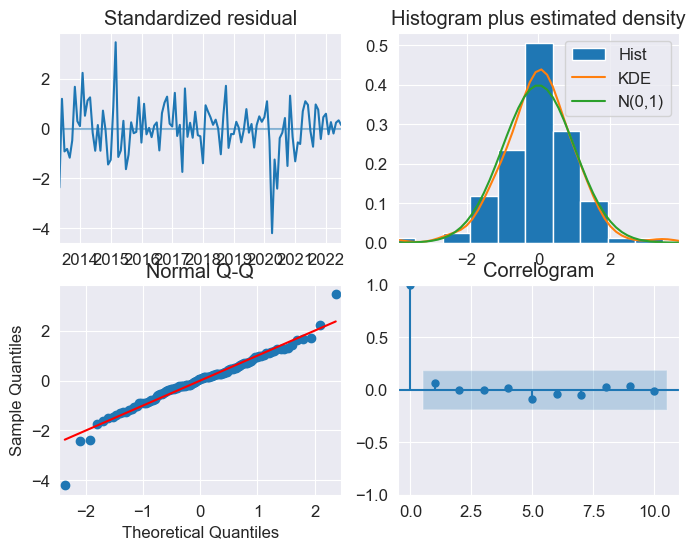

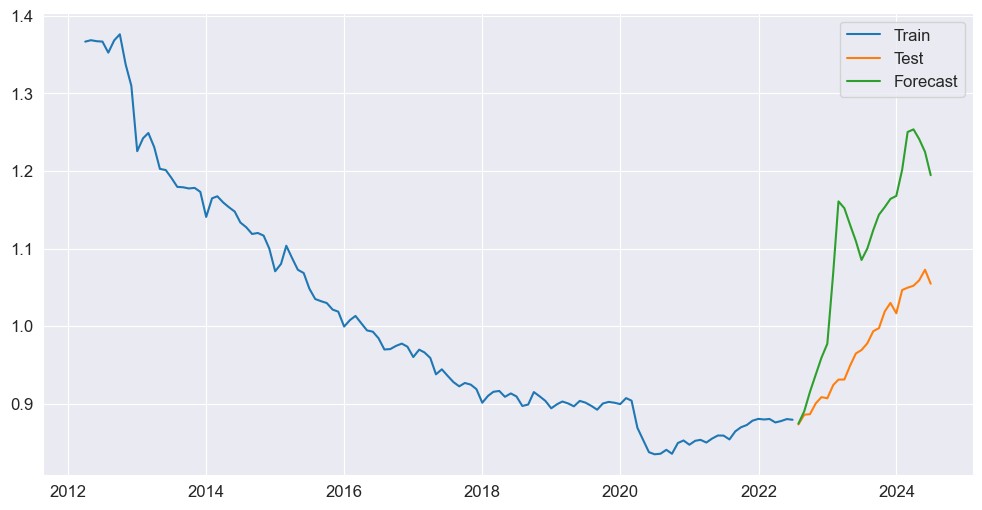

In [91]:
from statsmodels.tsa.ardl import ARDL

max_lag_y = [1, 2, 6, 8, 12, 13]
max_lag_X = [1, 2, 6, 8, 12, 13]

model_15 = ARDL(train_y, max_lag_y, pd.DataFrame(train_X), max_lag_X)
res_15 = model_15.fit()
print(res_15.aic)

fig = res_15.plot_diagnostics(figsize=(8, 6)) 
plt.show()

forecast_15 = res_15.forecast(steps=len(test_y), exog=pd.DataFrame(X))
plt.figure(figsize=(12, 6))
plt.plot(train_y, label='Train')
plt.plot(test_y, label='Test')
plt.plot(test_y.index, forecast_15, label='Forecast')
plt.legend()
plt.show()

# Checking CO-INTEGRATION

The test Engle-Granger test is valid for series that are integrated of order I(1), i.e., they are stationary or are stationary to the first order.

In [92]:
y = df_epargne['Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'].copy()
TAUX = df_taux['Taux de rémunération annuel des livrets ordinaires'].copy()
M2 = df_macro['Agregats monetaires France, M2'].copy()

df = pd.concat([y , M2, TAUX], axis=1)
df.columns = ['y', 'M2', 'Taux']

date_initial = '2012-03-01' 
date_end = '2024-07-01'

df = df.loc[ (date_initial < df.index) & (df.index < date_end)]
df = df.interpolate(method='linear', limit_direction='both')

df['y'] = df['y'] / df['M2']
df['y'] = df['y'] / df['y'].mean()  # Normalizing the series
y = df['y']
X = df.drop(columns=['y', 'M2'])


In [93]:
_ = is_stationary_adf_test(y, display=True)
_ = is_stationary_adf_test(y.diff().dropna(), display=True)
_ = is_stationary_adf_test(y.diff().diff().dropna(), display=True)

print()

_ = is_stationary_adf_test(X, display=True)
_ = is_stationary_adf_test(X.diff().dropna(), display=True)
_ = is_stationary_adf_test(X.diff().diff().dropna(), display=True)

Augmented Dickey-Fuller: Series is Non-Stationary
Augmented Dickey-Fuller: Series is Non-Stationary
Augmented Dickey-Fuller: Series is Stationary

Augmented Dickey-Fuller: Series is Non-Stationary
Augmented Dickey-Fuller: Series is Non-Stationary
Augmented Dickey-Fuller: Series is Stationary


Both are I(2). We have to use another choice

In [94]:
import statsmodels.api as sm

x = sm.add_constant(X)
model = sm.OLS(y, x).fit()

residuals = y - model.predict(x)

_ = is_stationary_adf_test(residuals, display=True)
_ = is_stationary_adf_test(residuals.diff().dropna(), display=True)

Augmented Dickey-Fuller: Series is Non-Stationary
Augmented Dickey-Fuller: Series is Stationary


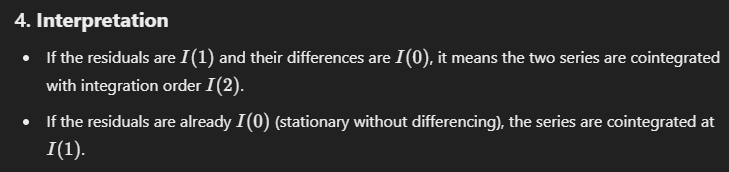

In [95]:
from statsmodels.tsa.vector_ar.vecm import VECM, select_order

data = pd.concat([y, X], axis=1)
data.columns = ['y', 'TAUX']

train_size = len(data) - 12 * 2
train, test = data[:train_size], data[train_size:]

data_diff = train.diff().dropna()

lag_order = select_order(data_diff, maxlags=12, deterministic='ci')
print(lag_order.summary())

 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -16.63     -16.43*   6.007e-08      -16.55
1       -16.67      -16.37   5.782e-08      -16.55
2       -16.61      -16.22   6.127e-08      -16.45
3       -16.86      -16.37   4.771e-08      -16.66
4       -16.87      -16.28   4.717e-08      -16.63
5       -16.92      -16.23   4.497e-08      -16.64
6       -16.94      -16.15   4.429e-08      -16.62
7       -17.28      -16.40   3.151e-08     -16.92*
8       -17.22      -16.24   3.339e-08      -16.82
9       -17.29      -16.21   3.123e-08      -16.85
10      -17.27      -16.10   3.192e-08      -16.80
11      -17.36      -16.08   2.954e-08      -16.84
12     -17.42*      -16.05  2.775e-08*      -16.87
--------------------------------------------------


In [96]:
vecm = VECM(data_diff, k_ar_diff=lag_order.aic, deterministic='ci')
vecm_fit = vecm.fit() 

print("Cointegration test summary:")
print(vecm_fit.summary())

Cointegration test summary:
Det. terms outside the coint. relation & lagged endog. parameters for equation y
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.y           0.5877      0.295      1.994      0.046       0.010       1.165
L1.TAUX       -0.2385      0.070     -3.384      0.001      -0.377      -0.100
L2.y           0.3889      0.269      1.447      0.148      -0.138       0.916
L2.TAUX       -0.1722      0.075     -2.305      0.021      -0.319      -0.026
L3.y           0.4272      0.248      1.725      0.084      -0.058       0.913
L3.TAUX       -0.1301      0.070     -1.863      0.062      -0.267       0.007
L4.y           0.4833      0.227      2.125      0.034       0.038       0.929
L4.TAUX       -0.0955      0.065     -1.466      0.143      -0.223       0.032
L5.y           0.3159      0.212      1.489      0.136      -0.100       0.732
L5.TAUX       -0.1360 

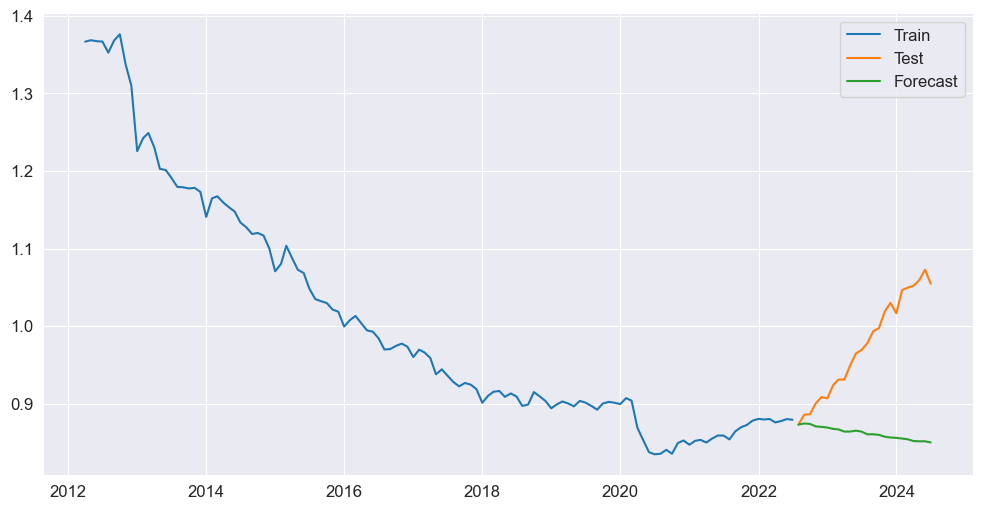

In [97]:
forecast_diff = vecm_fit.predict(steps=len(test))
forecast_diff = pd.DataFrame(forecast_diff, columns=['y', 'TAUX'])
forecast_diff.index = test.index
forecast = forecast_diff.cumsum() + train.iloc[-1]

plt.figure(figsize=(12, 6))
plt.plot(train['y'], label='Train')
plt.plot(test['y'], label='Test')
plt.plot(test.index, forecast['y'], label='Forecast')
plt.legend()

## VECM 

Since the data is cointegrated in I(2), we are going to use the VECM model. But the VECM model works for cointegrated data. So we are going to model the data in the first difference.

In [98]:
y = df_epargne['Comptes a terme et livrets ordinaires, actif des menages, encours trimestriel'].copy()
TAUX = df_taux['Taux de rémunération annuel des livrets ordinaires'].copy()
M2 = df_macro['Agregats monetaires France, M2'].copy()

df = pd.concat([y , M2, TAUX], axis=1)
df.columns = ['y', 'M2', 'Taux']

date_initial = '2012-03-01' 
date_end = '2024-07-01'

df = df.loc[ (date_initial < df.index) & (df.index < date_end)]
df = df.interpolate(method='linear', limit_direction='both')

df['y'] = df['y'] / df['M2']
df['y'] = df['y'] / df['y'].mean()  # Normalizing the series
df.drop(columns='M2', inplace=True)
df.head()

,y,Taux
2012-03-31,1.366577,1.99
2012-04-30,1.368426,1.99
2012-05-31,1.367121,1.95
2012-06-30,1.366635,1.97
2012-07-31,1.352409,1.97


### Co integration test - Johansen test

In [99]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

<Axes: >

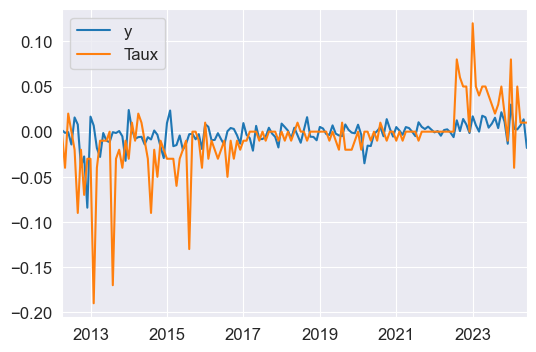

In [100]:
df_diff = df.copy().diff().dropna()
df_diff.plot()

In [101]:
result = coint_johansen(df, det_order=0, k_ar_diff=1)
print("Trace statistics:", result.lr1)
print("Critical Values:" )
print(result.cvt)

Trace statistics: [38.37688952  8.16776126]
Critical Values:
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


In [102]:
result = coint_johansen(df_diff, det_order=0, k_ar_diff=1) #adjust lag order
print("Trace statistics:", result.lr1)
print("Critical Values:" )
print(result.cvt)

Trace statistics: [109.02975109  14.7257607 ]
Critical Values:
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


The trace statistic is from the data, meanwhile the critical values are the percentile where we need to compare. each row is a rank. The middle value of each rank is 0.05 critical value. If the trace statistic is greater than the critical value, it means that the data is cointegrated.

If the data is rank 0 co-integrated, it means it has **One cointegration relationship**, which means in there exists a single long-term equilibrium. This could mean, for example, that one variable "corrects the other in the long run.

**Two cointegration relationship** means that there are two long-term equilibrium relationships. This could mean that there is a third variable correcting the other two variables (in this case it doesnt work) or they have a strong long-term relationship.

In [103]:
from statsmodels.tsa.vector_ar.vecm import VECM

train_size = len(df_diff) - 12 * 3
train, test = df_diff[:train_size], df_diff[train_size:]

model_16 = VECM(train, k_ar_diff=3, coint_rank=1, deterministic='ci') # adjust lag and rank as needed
model_16_fit = model_16.fit()
print(model_16_fit.summary(0.05))

Det. terms outside the coint. relation & lagged endog. parameters for equation y
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.y           0.2144      0.160      1.343      0.179      -0.098       0.527
L1.Taux       -0.2368      0.059     -4.018      0.000      -0.352      -0.121
L2.y           0.0818      0.134      0.610      0.542      -0.181       0.345
L2.Taux       -0.1848      0.051     -3.597      0.000      -0.285      -0.084
L3.y          -0.0875      0.097     -0.898      0.369      -0.278       0.103
L3.Taux       -0.1087      0.040     -2.742      0.006      -0.186      -0.031
Det. terms outside the coint. relation & lagged endog. parameters for equation Taux
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.y          -2.1455      0.338     -6.341  

In [104]:
print(model_16_fit.test_normality(0.05).summary())

normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         523.4          9.488   0.000  4
----------------------------------------


In [105]:
print(model_16_fit.test_whiteness(4, 0.05).summary())

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 4 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         8.396          5.991   0.015  2
----------------------------------------


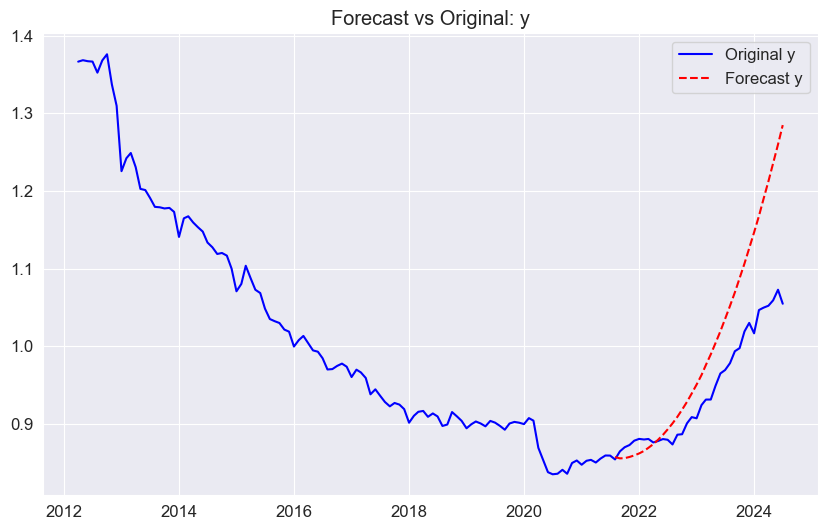

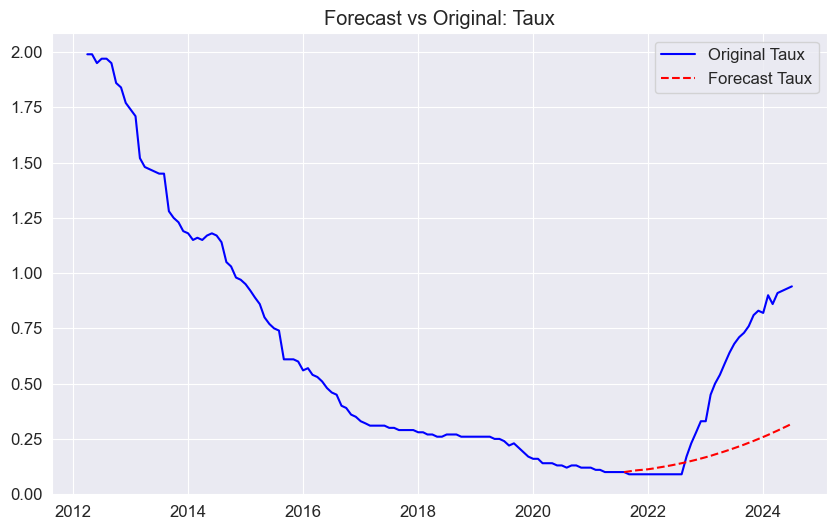

In [106]:
# Step 1: Forecast future differences
forecast_diff2 = model_16_fit.predict(steps=len(test))  # Predict second differences
forecast_diff2 = pd.DataFrame(forecast_diff2, columns=['y', 'Taux'], index=test.index)

# Step 2: Reintegrate second differences to first differences
# Get the last known first differences from the training data
last_diff_y = train['y'].iloc[-1]
last_diff_Taux = train['Taux'].iloc[-1]

forecast_diff1_y = forecast_diff2['y'].cumsum() + last_diff_y
forecast_diff1_Taux = forecast_diff2['Taux'].cumsum() + last_diff_Taux

# Step 3: Reintegrate first differences to original scale
# Get the last known original values from the training data
last_value_y = df['y'].iloc[train_size - 1]
last_value_Taux = df['Taux'].iloc[train_size - 1]

forecast_y = forecast_diff1_y.cumsum() + last_value_y
forecast_Taux = forecast_diff1_Taux.cumsum() + last_value_Taux

# Step 4: Combine with original data
original_y = df['y']
original_Taux = df['Taux']

# Step 5: Plot the results
# Plot for `y`
plt.figure(figsize=(10, 6))
plt.plot(original_y, label='Original y', color='blue')
plt.plot(forecast_y, label='Forecast y', color='red', linestyle='--')
plt.title('Forecast vs Original: y')
plt.legend()
plt.show()

# Plot for `Taux`
plt.figure(figsize=(10, 6))
plt.plot(original_Taux, label='Original Taux', color='blue')
plt.plot(forecast_Taux, label='Forecast Taux', color='red', linestyle='--')
plt.title('Forecast vs Original: Taux')
plt.legend()
plt.show()

Mean Squared Error: 0.001
Mean Absolute Error: 0.017
Mean Absolute Percentage Error: 266.377%


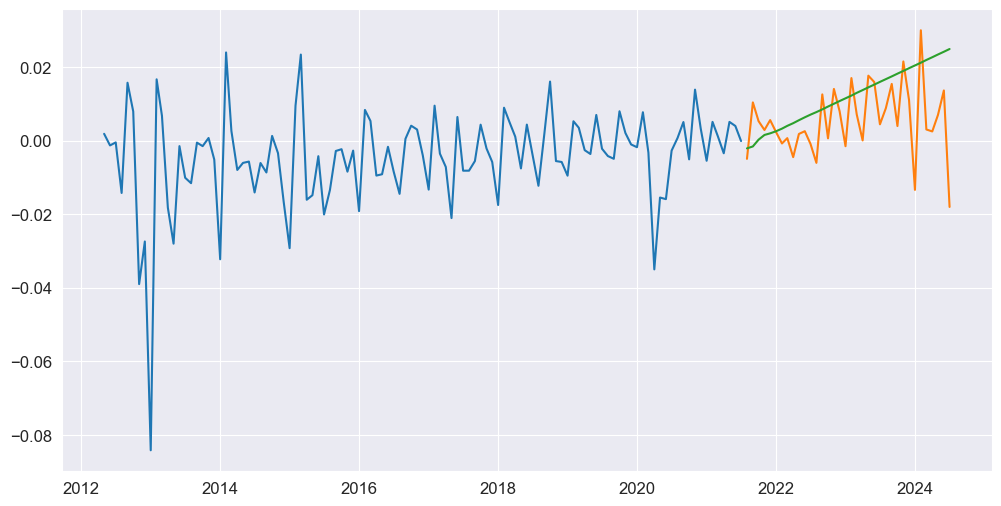

In [107]:
forecast_16, conf_int_16_inf, conf_int_16_sup = model_16_fit.predict(steps=len(test), alpha = 0.05)
last_value = train.iloc[-1].values

forecast_16_level = forecast_16.cumsum(axis=0) + last_value
forecast_16_level = pd.DataFrame(forecast_16_level, columns=['y', 'Taux'])
forecast_16_level.index = test.index

# Calculate the cumulative sum for the confidence intervals
conf_int_16_inf_level = conf_int_16_inf.cumsum(axis=0) + last_value
conf_int_16_sup_level = conf_int_16_sup.cumsum(axis=0) + last_value

# Convert to DataFrame and set the index
conf_int_16_inf_level = pd.DataFrame(conf_int_16_inf_level, columns=['y', 'Taux'])
conf_int_16_sup_level = pd.DataFrame(conf_int_16_sup_level, columns=['y', 'Taux'])
conf_int_16_inf_level.index = test.index
conf_int_16_sup_level.index = test.index

display_error(forecast_16_level, test)

plt.figure(figsize=(12, 6))
plt.plot(train['y'], label='Train')
plt.plot(test['y'], label='Test')
plt.plot(test.index, forecast_16_level['y'], label='Forecast')
#plt.fill_between(test.index, conf_int_16_inf_level['y'], conf_int_16_sup_level['y'], color='k', alpha=0.1, label='Confidence Interval')